<a href="https://colab.research.google.com/github/Michael0605/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Cargar los datos directamente desde la API utilizando Python.
*Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import requests
import pandas as pd

# 1. Cargar datos desde la API de GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)

if response.status_code == 200:
    # 2. Convertir JSON a DataFrame inicial
    data = response.json()
    df_flat_raw = pd.DataFrame(data)

    # 3. Normalizar columnas anidadas
    df_flat_customer = pd.json_normalize(df_flat_raw['customer'])
    df_flat_phone = pd.json_normalize(df_flat_raw['phone'])
    df_flat_internet = pd.json_normalize(df_flat_raw['internet'])
    df_flat_account = pd.json_normalize(df_flat_raw['account'])

    # 4. Combinar todas las columnas en un DataFrame plano
    df_flat = pd.concat([
        df_flat_raw[['customerID', 'Churn']],  # Columnas no anidadas
        df_flat_customer,
        df_flat_phone,
        df_flat_internet,
        df_flat_account
    ], axis=1)

    # 5. Mostrar el resultado
    print("DataFrame plano listo para análisis:")
    print(df_flat.head())

    # Opcional: Guardar como CSV
    df_flat.to_csv('telecomx_clientes_flat.csv', index=False)
else:
    print(f"Error al cargar datos. Código: {response.status_code}")

DataFrame plano listo para análisis:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes       

In [2]:
df_flat.info()  # Revisar si 'SeniorCitizen' es int y 'Charges.Total' es float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Corregir tipos de datos


Explorar datos nulos.

In [3]:
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.



 Exploración Inicial del DataFrame


In [4]:
# Mostrar las primeras filas
print(df_flat.head())

# Ver estructura del DataFrame (columnas y tipos de datos)
print("\nInformación del DataFrame:")
print(df_flat.info())

# Estadísticas descriptivas de columnas numéricas
print("\nEstadísticas descriptivas:")
print(df_flat.describe())

# Ver valores únicos en columnas categóricas (ej: Churn, gender)
print("\nValores únicos en 'Churn':", df_flat['Churn'].unique())
print("Valores únicos en 'Contract':", df_flat['Contract'].unique())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

Muestras las columnas existentes


In [5]:
print(df_flat.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


filtrado para insights

In [6]:
# Analisis por tipo de contrato
print("***Churn por tipo de contrato***")
print(df_flat.groupby('Contract')['Churn'].value_counts(normalize=True))

# Analisis por cargo mensual (agrupado)
print("***Churn por cargo mensual***")
df_flat['MonthlyGroup'] = pd.cut(df_flat['Charges.Monthly'], bins=[0, 50, 100, 150, 200])

print(df_flat.groupby('MonthlyGroup')['Churn'].value_counts())

***Churn por tipo de contrato***
Contract        Churn
Month-to-month  No       0.554307
                Yes      0.413233
                         0.032459
One year        No       0.860434
                Yes      0.109282
                         0.030283
Two year        No       0.944923
                         0.027539
                Yes      0.027539
Name: proportion, dtype: float64
***Churn por cargo mensual***
MonthlyGroup  Churn
(0, 50]       No       1938
              Yes       361
                         81
(50, 100]     No       2587
              Yes      1255
                        108
(100, 150]    No        649
              Yes       253
                         35
(150, 200]                0
              No          0
              Yes         0
Name: count, dtype: int64


/tmp/ipython-input-1609488752.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_flat.groupby('MonthlyGroup')['Churn'].value_counts())


Limpieza y Preparación de Datos

In [7]:
# Convertir 'Charges.Total' a numérico (manejando errores)
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')

# Rellenar nulos (ej. con 0 para nuevos clientes)
df_flat['Charges.Total'] = df_flat['Charges.Total'].fillna(0)

# Codificar variables categóricas (ej. Churn: Yes=1, No=0)
df_flat['ChurnBinary'] = df_flat['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Visualización Rápida con Seaborn

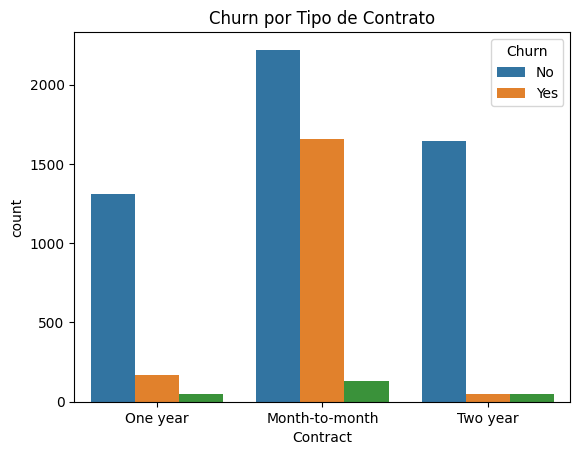

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras: Churn por tipo de contrato
sns.countplot(data=df_flat, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()

Exploración Inicial del Dataset

In [9]:
# Primeras filas (visualización rápida)
print("--- Primeras 5 filas ---")
print(df_flat.head())

# Estructura del dataset (filas, columnas, tipos de datos)
print("\n--- Información del DataFrame ---")
print(df_flat.info())

# Estadísticas descriptivas de columnas numéricas
print("\n--- Estadísticas Descriptivas ---")
print(df_flat.describe())

# Estadísticas de columnas categóricas
print("\n--- Variables Categóricas ---")
print(df_flat.describe(include=['object']))

--- Primeras 5 filas ---
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... TechSupport StreamingTV  \
0          Yes            No             DSL  ...         Yes         Yes   
1          Yes           Yes             DSL  ...          No          No   
2          Yes            No     Fiber optic  ...          No          No   
3          Yes            No     Fiber optic  ...          No         Yes   
4          Yes            No     Fiber optic  ...         Yes         Yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0

Diccionario de Datos

In [10]:
# Crear un diccionario de datos manual (basado en tu dataset)
diccionario = {
    'customerID': 'Identificador único del cliente',
    'Churn': 'Target: "Yes" (canceló) / "No" (activo)',
    'tenure': 'Meses de permanencia del cliente',
    'Charges.Monthly': 'Monto facturado mensualmente',
    'Charges.Total': 'Monto total facturado al cliente',
    'Contract': 'Tipo de contrato (Month-to-month, One year, Two year)',
    'InternetService': 'Tipo de servicio (DSL, Fiber optic, No)',
    'PaymentMethod': 'Método de pago (Electronic check, Credit card, etc.)'
}

# Mostrar el diccionario
print("\n--- Diccionario de Datos ---")
for col, desc in diccionario.items():
    print(f"{col}: {desc}")



--- Diccionario de Datos ---
customerID: Identificador único del cliente
Churn: Target: "Yes" (canceló) / "No" (activo)
tenure: Meses de permanencia del cliente
Charges.Monthly: Monto facturado mensualmente
Charges.Total: Monto total facturado al cliente
Contract: Tipo de contrato (Month-to-month, One year, Two year)
InternetService: Tipo de servicio (DSL, Fiber optic, No)
PaymentMethod: Método de pago (Electronic check, Credit card, etc.)


Datos Relevantes

In [11]:
# Variables clave para análisis de Churn (ajusta según tu dataset)
variables_relevantes = [
    'Churn',           # Target
    'tenure',          # Antigüedad
    'Contract',        # Tipo de contrato
    'Charges.Monthly',  # Cargos mensuales
    'InternetService', # Servicio de internet
    'PaymentMethod'    # Método de pago
]

# Filtrar el DataFrame
df_flat_relevante = df_flat[variables_relevantes]

# Análisis rápido de distribución
print("\n--- Distribución de Variables Relevantes ---")
print(df_flat_relevante.groupby('Churn').describe(percentiles=[]))


--- Distribución de Variables Relevantes ---
       tenure                                        Charges.Monthly  \
        count       mean        std  min   50%   max           count   
Churn                                                                  
        224.0  31.571429  24.998552  1.0  29.0  72.0           224.0   
No     5174.0  37.569965  24.113777  0.0  38.0  72.0          5174.0   
Yes    1869.0  17.979133  19.531123  1.0  10.0  72.0          1869.0   

                                                    
            mean        std    min     50%     max  
Churn                                               
       63.412277  31.388712  18.75  69.100  115.55  
No     61.265124  31.092648  18.25  64.425  118.75  
Yes    74.441332  24.666053  18.85  79.650  118.35  


Comprobación de incoherencias en los datos- Depuracion de Datos

In [12]:
# 1. Valores nulos
print("\n" + "="*50)
print("1. VALORES NULOS")
print("="*50)
print("--- Columnas con valores nulos ---")
null_counts = df_flat.isnull().sum()
print(null_counts[null_counts > 0])

# 2. Valores duplicados
print("\n" + "="*50)
print("2. VALORES DUPLICADOS")
print("="*50)
print(f"Clientes duplicados (total): {df_flat.duplicated().sum()}")
print(f"IDs de cliente duplicados: {df_flat['customerID'].duplicated().sum()}")

# 3. Consistencia de categorías
print("\n" + "="*50)
print("3. CONSISTENCIA DE CATEGORÍAS")
print("="*50)
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
expected_values = {
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card']
}

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print("Valores únicos:", df_flat[col].unique())
    unexpected = set(df_flat[col].unique()) - set(expected_values.get(col, []))
    if unexpected:
        print(f"¡Valores inesperados!: {unexpected}")

# 4. Rangos numéricos
print("\n" + "="*50)
print("4. RANGOS NUMÉRICOS")
print("="*50)
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
print(df_flat[numeric_cols].describe())

# Verificación de valores negativos
print("\n--- Valores negativos ---")
for col in numeric_cols:
    neg_values = df_flat[df_flat[col] < 0]
    print(f"{col}: {len(neg_values)} valores negativos")

# 5. Inconsistencias lógicas
print("\n" + "="*50)
print("5. INCONSISTENCIAS LÓGICAS")
print("="*50)
# Clientes sin Internet pero con servicios online
print("\n--- Clientes sin Internet pero con servicios online ---")
inconsistencia1 = df_flat[(df_flat['InternetService'] == 'No') &
                   ((df_flat['OnlineSecurity'] != 'No') |
                    (df_flat['OnlineBackup'] != 'No') |
                    (df_flat['DeviceProtection'] != 'No') |
                    (df_flat['TechSupport'] != 'No') |
                    (df_flat['StreamingTV'] != 'No') |
                    (df_flat['StreamingMovies'] != 'No'))]
print(f"Casos encontrados: {len(inconsistencia1)}")
if len(inconsistencia1) > 0:
    print(inconsistencia1[['customerID', 'InternetService', 'OnlineSecurity']].head())

# Clientes con tenure=0 pero cargos positivos
print("\n--- Clientes con tenure=0 pero cargos positivos ---")
inconsistencia2 = df_flat[(df_flat['tenure'] == 0) &
                   ((df_flat['Charges.Monthly'] > 0) |
                    (df_flat['Charges.Total'] > 0))]
print(f"Casos encontrados: {len(inconsistencia2)}")
if len(inconsistencia2) > 0:
    print(inconsistencia2[['customerID', 'tenure', 'Charges.Monthly', 'Charges.Total']].head())

# 6. Verificación final de limpieza
print("\n" + "="*50)
print("6. VERIFICACIÓN FINAL")
print("="*50)
print("--- Resumen de limpieza ---")
print(f"Nulos en Charges.Total: {df_flat['Charges.Total'].isnull().sum()}")
print(f"Churn codificado:\n{df_flat['ChurnBinary'].value_counts()}")


1. VALORES NULOS
--- Columnas con valores nulos ---
Series([], dtype: int64)

2. VALORES DUPLICADOS
Clientes duplicados (total): 0
IDs de cliente duplicados: 0

3. CONSISTENCIA DE CATEGORÍAS

--- Contract ---
Valores únicos: ['One year' 'Month-to-month' 'Two year']

--- InternetService ---
Valores únicos: ['DSL' 'Fiber optic' 'No']

--- PaymentMethod ---
Valores únicos: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
¡Valores inesperados!: {'Bank transfer (automatic)', 'Credit card (automatic)'}

4. RANGOS NUMÉRICOS
            tenure  Charges.Monthly  Charges.Total
count  7267.000000      7267.000000    7267.000000
mean     32.346498        64.720098    2277.182035
std      24.571773        30.129572    2268.648587
min       0.000000        18.250000       0.000000
25%       9.000000        35.425000     396.200000
50%      29.000000        70.300000    1389.200000
75%      55.000000        89.875000    3778.525000
max      72.000000       1

Manejo de Inconsistencias

In [13]:
## ==================================================
## TRATAMIENTO DE INCONSISTENCIAS
## ==================================================

# 1. Inconsistencias en PaymentMethod (valores inesperados)
print("\n1. Normalizando PaymentMethod...")
# Los valores "automáticos" son válidos pero inconsistentes en formato, los normalizamos:
df_flat['PaymentMethod'] = df_flat['PaymentMethod'].replace({
    'Credit card (automatic)': 'Credit card',
    'Bank transfer (automatic)': 'Bank transfer'
})
print("Valores únicos actualizados en PaymentMethod:", df_flat['PaymentMethod'].unique())

# 2. Clientes sin Internet pero con servicios online
print("\n2. Corrigiendo servicios online para clientes sin Internet...")
# Lista de columnas de servicios online
online_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Para clientes sin Internet, todos los servicios online deben ser "No internet service"
for service in online_services:
    df_flat.loc[df_flat['InternetService'] == 'No', service] = 'No internet service'

# Verificación
inconsistencia_after = df_flat[(df_flat['InternetService'] == 'No') &
                         (df_flat['OnlineSecurity'] != 'No internet service')]
print(f"Casos restantes después de corrección: {len(inconsistencia_after)}")

# 3. Clientes con tenure=0 pero cargos positivos
print("\n3. Ajustando cargos para clientes con tenure=0...")
# Estos casos podrían ser errores de registro. Dos enfoques posibles:

# Opción A: Poner cargos en 0 (asumiendo que son clientes nuevos)
df_flat.loc[(df_flat['tenure'] == 0) & ((df_flat['Charges.Monthly'] > 0) |
                              (df_flat['Charges.Total'] > 0)),
      ['Charges.Monthly', 'Charges.Total']] = 0.0

# Opción B: Ajustar tenure a 1 mes (si los cargos son válidos)
# df_flat.loc[(df_flat['tenure'] == 0) & (df_flat['Charges.Monthly'] > 0), 'tenure'] = 1

# Verificación
inconsistencia_after = df_flat[(df_flat['tenure'] == 0) &
                         ((df_flat['Charges.Monthly'] > 0) |
                          (df_flat['Charges.Total'] > 0))]
print(f"Casos restantes después de corrección: {len(inconsistencia_after)}")

# 4. Normalización adicional de categorías
print("\n4. Normalizando categorías...")
# Asegurar consistencia en mayúsculas/espacios
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
for col in categorical_cols:
    df_flat[col] = df_flat[col].str.strip()  # Eliminar espacios en blanco
    df_flat[col] = df_flat[col].str.title()  # Formato título (primera letra mayúscula)

# 5. Creación de columna de inconsistencias resueltas
print("\n5. Registrando cambios realizados...")
# Creamos una columna para rastrear filas modificadas
df_flat['Modified'] = 'No'
df_flat.loc[(df_flat['InternetService'] == 'No') &
       (df_flat['OnlineSecurity'] == 'No internet service'), 'Modified'] = 'OnlineServices'
df_flat.loc[(df_flat['tenure'] == 0) &
       (df_flat['Charges.Monthly'] == 0) &
       (df_flat['Charges.Total'] == 0), 'Modified'] = 'ZeroTenure'

# ==================================================
# VERIFICACIÓN POSTERIOR AL TRATAMIENTO
# ==================================================
print("\n" + "="*50)
print("RESULTADOS DESPUÉS DEL TRATAMIENTO")
print("="*50)

# Verificación final
print("\n--- Valores únicos en PaymentMethod ---")
print(df_flat['PaymentMethod'].unique())

print("\n--- Clientes sin Internet con servicios online ---")
print(len(df_flat[(df_flat['InternetService'] == 'No') &
            (df_flat['OnlineSecurity'] != 'No internet service')]))

print("\n--- Clientes con tenure=0 y cargos positivos ---")
print(len(df_flat[(df_flat['tenure'] == 0) &
            ((df_flat['Charges.Monthly'] > 0) |
             (df_flat['Charges.Total'] > 0))]))

print("\n--- Resumen de modificaciones realizadas ---")
print(df_flat['Modified'].value_counts())

# Guardar dataset corregido
df_flat.to_csv('telecom_data_corregido.csv', index=False)
print("\nDataset corregido guardado como 'telecom_data_corregido.csv'")


1. Normalizando PaymentMethod...
Valores únicos actualizados en PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']

2. Corrigiendo servicios online para clientes sin Internet...
Casos restantes después de corrección: 0

3. Ajustando cargos para clientes con tenure=0...
Casos restantes después de corrección: 0

4. Normalizando categorías...

5. Registrando cambios realizados...

RESULTADOS DESPUÉS DEL TRATAMIENTO

--- Valores únicos en PaymentMethod ---
['Mailed Check' 'Electronic Check' 'Credit Card' 'Bank Transfer']

--- Clientes sin Internet con servicios online ---
0

--- Clientes con tenure=0 y cargos positivos ---
0

--- Resumen de modificaciones realizadas ---
Modified
No                5681
OnlineServices    1575
ZeroTenure          11
Name: count, dtype: int64

Dataset corregido guardado como 'telecom_data_corregido.csv'


In [14]:
print("Nombres de variables definidas:", [var for var in globals() if 'df' in var])

Nombres de variables definidas: ['df_flat_raw', 'df_flat_customer', 'df_flat_phone', 'df_flat_internet', 'df_flat_account', 'df_flat', 'df_flat_relevante']


Columna de cuentas diarias


--- Muestra de Cuentas Diarias ---
   customerID  Charges.Monthly  Cuentas_Diarias  tenure
0  0002-ORFBO            65.60             2.19       9
1  0003-MKNFE            59.90             2.00       9
2  0004-TLHLJ            73.90             2.46       4
3  0011-IGKFF            98.00             3.27      13
4  0013-EXCHZ            83.90             2.80       3
5  0013-MHZWF            69.40             2.31       9
6  0013-SMEOE           109.70             3.66      71
7  0014-BMAQU            84.65             2.82      63
8  0015-UOCOJ            48.20             1.61       7
9  0016-QLJIS            90.45             3.02      65

--- Estadísticas de Cuentas Diarias ---
Media: $2.16 por día
Mínimo: $0.0
Máximo: $3.96
Mediana: $2.34


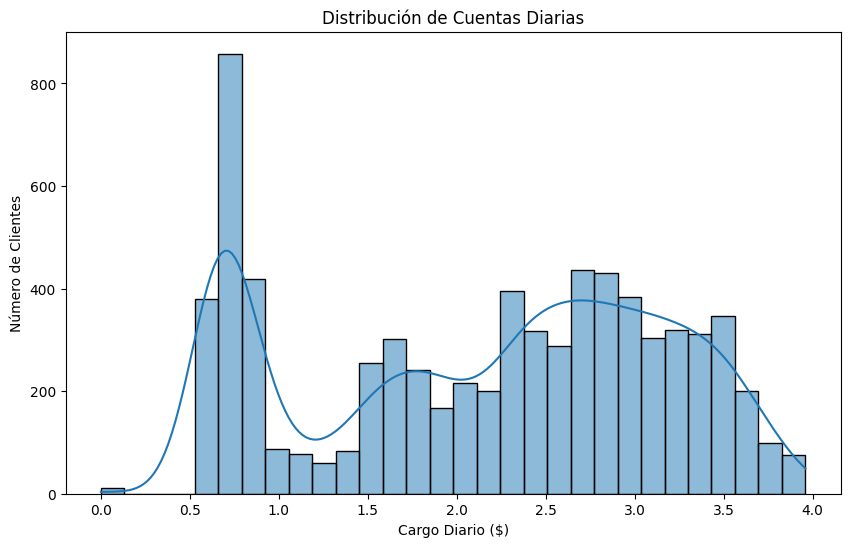

In [15]:
import numpy as np

# Calculamos el valor diario (cargo mensual / 30 días)
df_flat['Cuentas_Diarias'] = round(df_flat['Charges.Monthly'] / 30, 2)

# Para clientes con tenure=0, podríamos considerar el primer día de facturación completo
# Opcional: df.loc[df['tenure'] == 0, 'Cuentas_Diarias'] = df['Charges.Monthly']

# Verificación de resultados
print("\n--- Muestra de Cuentas Diarias ---")
print(df_flat[['customerID', 'Charges.Monthly', 'Cuentas_Diarias', 'tenure']].head(10))


# Estadísticas descriptivas
print("\n--- Estadísticas de Cuentas Diarias ---")
print(f"Media: ${round(df_flat['Cuentas_Diarias'].mean(), 2)} por día")
print(f"Mínimo: ${round(df_flat['Cuentas_Diarias'].min(), 2)}")
print(f"Máximo: ${round(df_flat['Cuentas_Diarias'].max(), 2)}")
print(f"Mediana: ${round(df_flat['Cuentas_Diarias'].median(), 2)}")

# Visualización rápida
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_flat, x='Cuentas_Diarias', bins=30, kde=True)
plt.title('Distribución de Cuentas Diarias')
plt.xlabel('Cargo Diario ($)')
plt.ylabel('Número de Clientes')
plt.show()

Estandarización y transformación de datos (opcional)

Proceso opcional pero recomendado para:

Convertir valores categóricos (ej: "Sí"/"No" → 1/0) en formatos numéricos, facilitando modelos analíticos.

Renombrar columnas o traducir términos técnicos para mejorar comprensión y comunicación con stakeholders.

Asegurar consistencia en los datos, optimizando su interpretación y uso en etapas posteriores.

Beneficios clave:
✔ Compatibilidad con herramientas matemáticas.
✔ Información más accesible para equipos no técnicos.
✔ Reducción de ambigüedades en los resultados.


In [16]:
# 1. Verificar las columnas disponibles
print("\n1. Verificar las columnas disponibles")
print("Columnas disponibles en el DataFrame:")
print(df_flat.columns.tolist())

# 2. Buscar variantes del nombre 'Churn'
print("\n2. Buscar variantes del nombre 'Churn'")
possible_names = ['churn', 'CHURN', 'Status', 'Customer_Status', 'Churn_Status']
for name in possible_names:
    if name in df_flat.columns:
        print(f"\nColumna encontrada: {name}")
        # Renombrar a 'Churn' para estandarizar
        df_flat = df_flat.rename(columns={name: 'Churn'})
        break
else:
    print("\nNo se encontró ninguna columna equivalente a 'Churn' - se verificará en datos anidados")

# 3. Si no se encuentra, verificar en datos originales
print("\n3. Si no se encuentra, verificar en datos originales")
if 'Churn' not in df_flat.columns:
    print("\nRevisando estructura original...")
    if 'customer' in df_flat.columns and isinstance(df_flat['customer'].iloc[0], dict):
        print("Extrayendo 'Churn' de datos anidados...")
        df_flat['Churn'] = df_flat['customer'].apply(lambda x: x.get('Churn', None))

# 4. Limpieza y normalización de la columna 'Churn'
print("\n4. Limpieza y normalización de 'Churn'")
if 'Churn' in df_flat.columns:
    # Limpieza de valores
    df_flat['Churn'] = df_flat['Churn'].astype(str).str.strip().str.title()

    # Reemplazar valores inconsistentes
    df_flat['Churn'] = df_flat['Churn'].replace({
        'Nan': None,
        'N/a': None,
        '': None
    })

    # Filtrar solo valores Yes/No válidos
    valid_churn = df_flat['Churn'].isin(['Yes', 'No'])
    df_flat = df_flat[valid_churn].copy()

    print("\nValores únicos en 'Churn' después de limpieza:")
    print(df_flat['Churn'].value_counts(dropna=False))

    # Binarización robusta
    df_flat['Churn_Binario'] = df_flat['Churn'].map({'Yes': 1, 'No': 0}).astype('int8')

    print("\nBinarización completada (valores enteros):")
    print(df_flat[['Churn', 'Churn_Binario']].head())

    print("\nResumen final:")
    print(f"Total registros válidos: {len(df_flat)}")
    print(f"Distribución de Churn: {df_flat['Churn_Binario'].value_counts(normalize=True)}")
else:
    print("\nError crítico: No se pudo encontrar o crear la columna 'Churn'")
    print("Revisa la estructura de tus datos originales")

# Opcional: Guardar el dataframe limpio
df_flat.to_csv('datos_telecom_limpios.csv', index=False)
print("\nDataFrame limpio guardado como 'datos_telecom_limpios.csv'")


1. Verificar las columnas disponibles
Columnas disponibles en el DataFrame:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'MonthlyGroup', 'ChurnBinary', 'Modified', 'Cuentas_Diarias']

2. Buscar variantes del nombre 'Churn'

No se encontró ninguna columna equivalente a 'Churn' - se verificará en datos anidados

3. Si no se encuentra, verificar en datos originales

4. Limpieza y normalización de 'Churn'

Valores únicos en 'Churn' después de limpieza:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Binarización completada (valores enteros):
  Churn  Churn_Binario
0    No              0
1    No              0
2   Yes              1
3   Yes              1
4   Yes              1

Resumen final:
Total regis

Analisis descriptivo.
Realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

=== ANÁLISIS DESCRIPTIVO DE CLIENTES ===

1. Estadísticas descriptivas de variables numéricas:
        tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7043.00          7043.00        7043.00          7043.00
mean     32.37            64.70        2279.73             2.16
std      24.56            30.17        2266.79             1.01
min       0.00             0.00           0.00             0.00
25%       9.00            35.45         398.55             1.18
50%      29.00            70.35        1394.55             2.34
75%      55.00            89.85        3786.60             2.99
95%      72.00           107.40        6921.02             3.58
max      72.00           118.75        8684.80             3.96
mode      1.00            20.05           0.00             0.66
IQR      46.00            54.40        3388.05             1.81

2. Distribución de variables categóricas:

--- gender ---
gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64

--- Senio

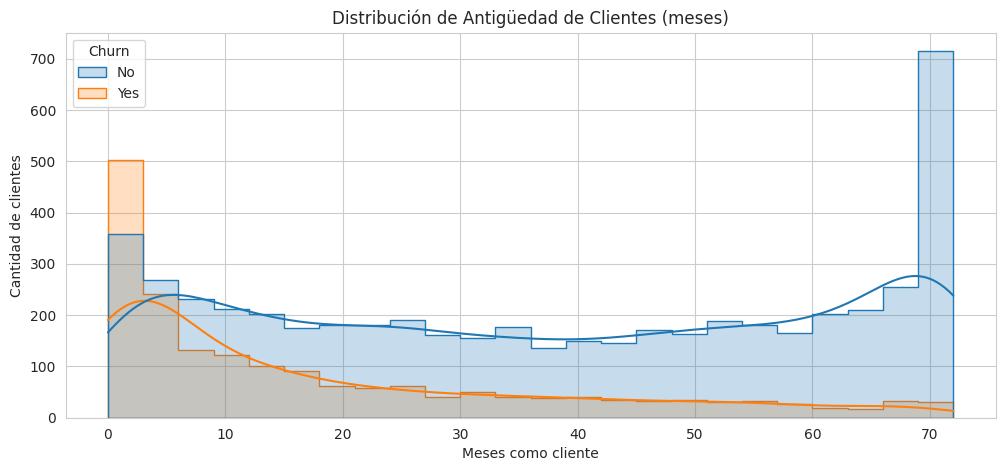

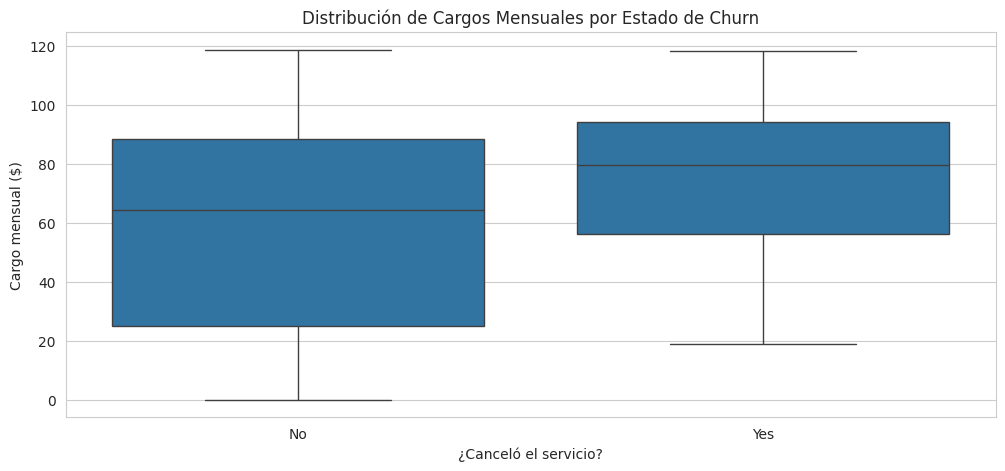

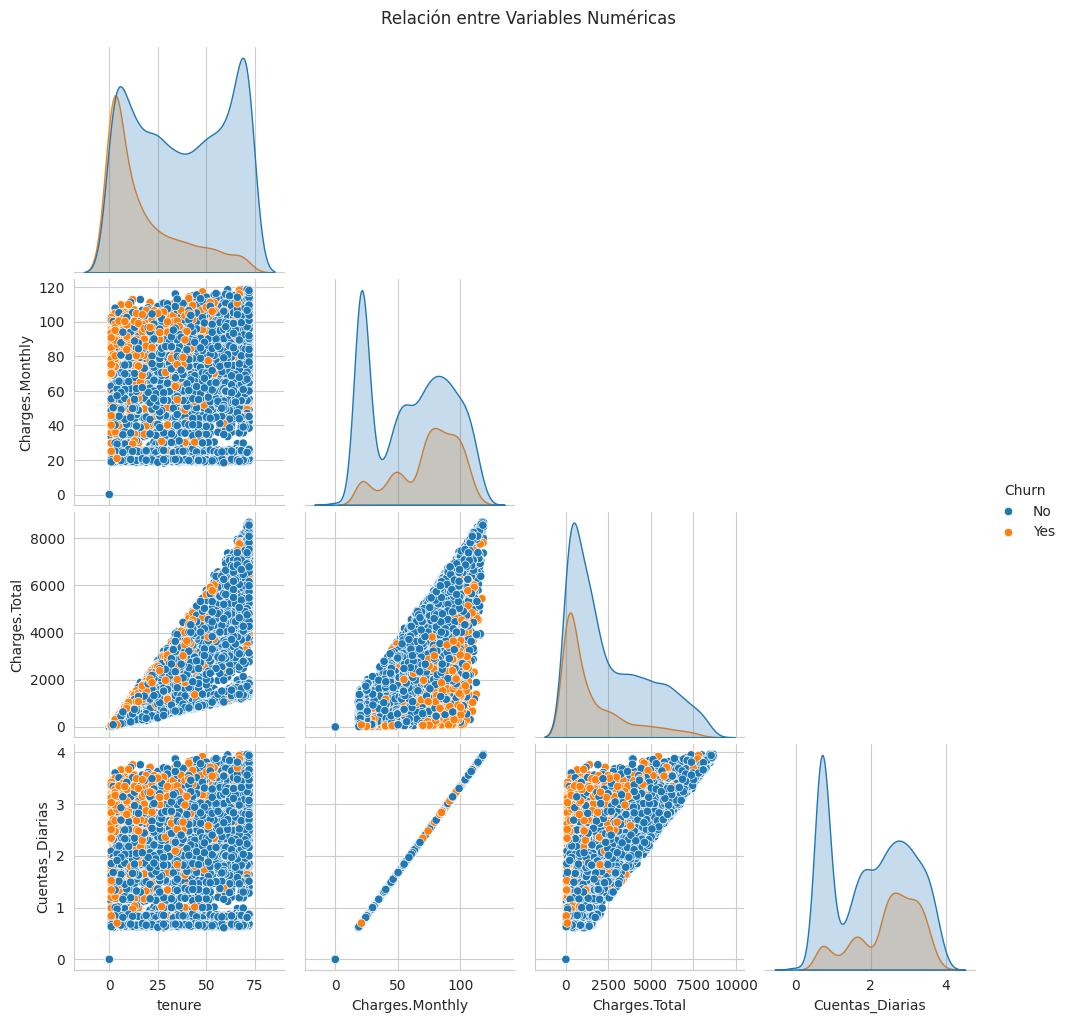

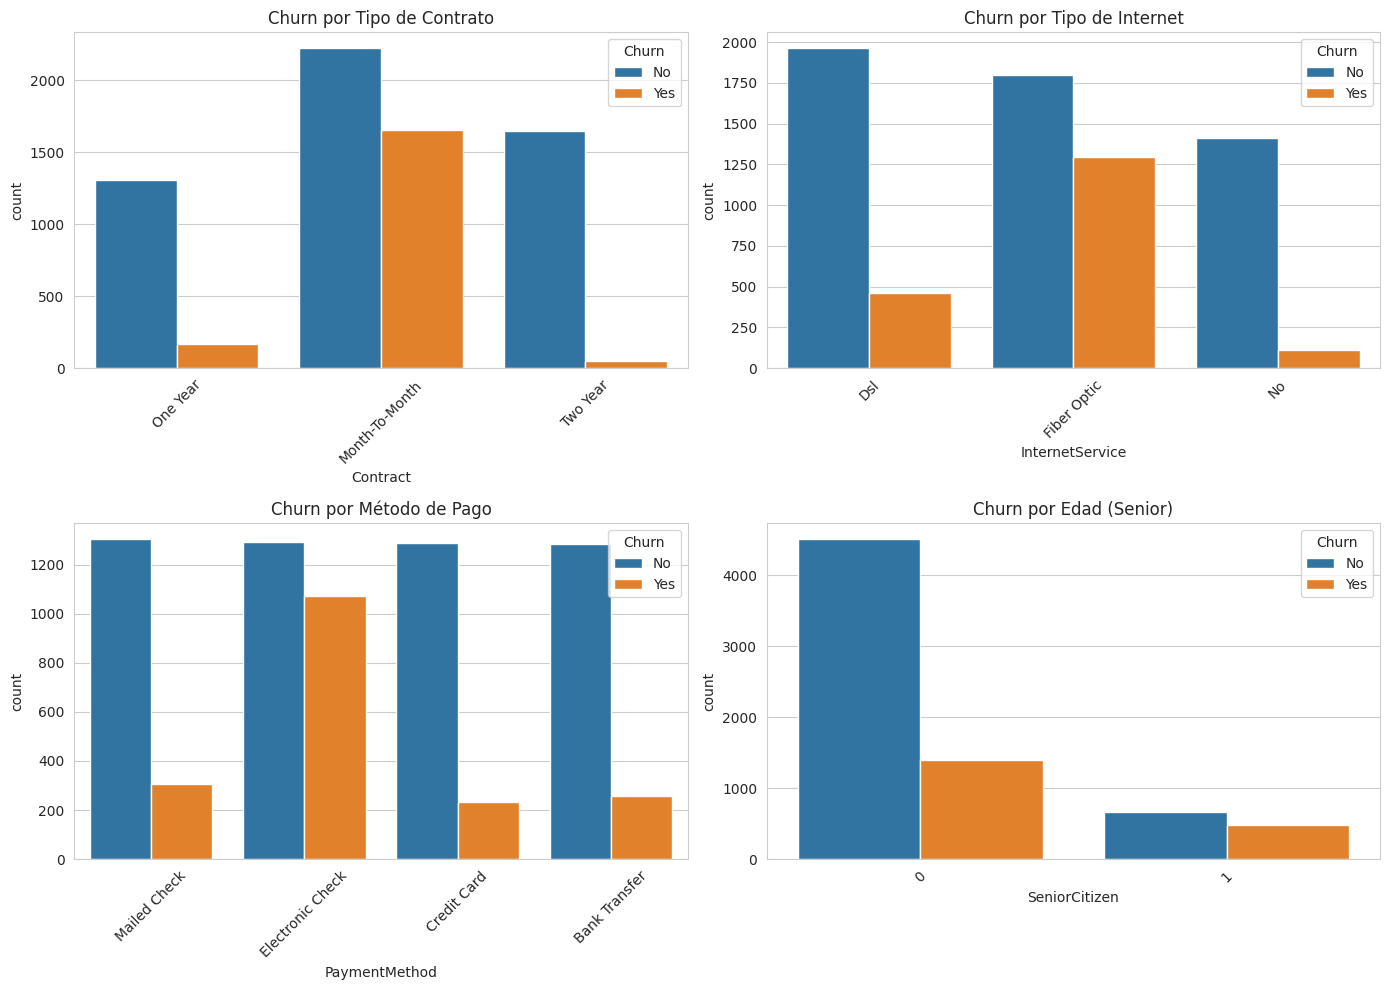


5. Matriz de correlación:
Churn_Binario      1.00
Cuentas_Diarias    0.19
Charges.Monthly    0.19
Charges.Total     -0.20
tenure            -0.35
Name: Churn_Binario, dtype: float64

=== RESUMEN EJECUTIVO ===

Total clientes analizados: 7043
Tasa global de Churn: 26.5%

Principales hallazgos:
- Los clientes con contratos mensuales tienen mayor tasa de Churn
- Los clientes con servicio de Fibra Óptica muestran mayor propensión a cancelar
- Existe una correlación negativa entre antigüedad (tenure) y probabilidad de Churn
- Los cargos mensuales promedio son más altos para clientes que cancelan

Análisis completado y resultados guardados en 'analisis_descriptivo.txt'


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ==============================================
## 1. Configuración inicial
## ==============================================
print("=== ANÁLISIS DESCRIPTIVO DE CLIENTES ===")

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## ==============================================
## 2. Análisis de variables numéricas
## ==============================================
print("\n1. Estadísticas descriptivas de variables numéricas:")
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
numeric_stats = df_flat[numeric_cols].describe(percentiles=[.25, .5, .75, .95])

# Agregar moda y rango intercuartílico (IQR)
modes = df_flat[numeric_cols].mode().iloc[0]
numeric_stats.loc['mode'] = modes
numeric_stats.loc['IQR'] = numeric_stats.loc['75%'] - numeric_stats.loc['25%']

print(numeric_stats.round(2))

## ==============================================
## 3. Análisis de variables categóricas
## ==============================================
print("\n2. Distribución de variables categóricas:")
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'InternetService', 'Contract', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df_flat[col].value_counts(normalize=True).round(2))

## ==============================================
## 4. Análisis por segmentos (Churn)
## ==============================================
print("\n3. Comparativa entre clientes que se quedan vs. los que se van (Churn):")

def segment_stats(segment_col):
    stats = df_flat.groupby('Churn')[segment_col].describe()
    stats['IQR'] = stats['75%'] - stats['25%']
    return stats.round(2)

print("\na. Antigüedad (tenure):")
print(segment_stats('tenure'))

print("\nb. Cargos Mensuales:")
print(segment_stats('Charges.Monthly'))

print("\nc. Cargos Totales:")
print(segment_stats('Charges.Total'))

## ==============================================
## 5. Visualizaciones clave
## ==============================================
print("\n4. Generando visualizaciones...")

try:
    # Gráfico 1: Distribución de antigüedad
    plt.figure(figsize=(12, 5))
    sns.histplot(data=df_flat, x='tenure', hue='Churn', bins=24, kde=True, element='step')
    plt.title('Distribución de Antigüedad de Clientes (meses)')
    plt.xlabel('Meses como cliente')
    plt.ylabel('Cantidad de clientes')
    plt.show()

    # Gráfico 2: Cargos mensuales vs. Churn
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_flat, x='Churn', y='Charges.Monthly')
    plt.title('Distribución de Cargos Mensuales por Estado de Churn')
    plt.xlabel('¿Canceló el servicio?')
    plt.ylabel('Cargo mensual ($)')
    plt.show()

    # Gráfico 3: Relación entre variables numéricas
    numeric_plot = sns.pairplot(df_flat[numeric_cols + ['Churn']], hue='Churn', corner=True)
    numeric_plot.fig.suptitle('Relación entre Variables Numéricas', y=1.02)
    plt.show()

    # Gráfico 4: Churn por categorías importantes
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.countplot(data=df_flat, x='Contract', hue='Churn', ax=axes[0, 0])
    sns.countplot(data=df_flat, x='InternetService', hue='Churn', ax=axes[0, 1])
    sns.countplot(data=df_flat, x='PaymentMethod', hue='Churn', ax=axes[1, 0])
    sns.countplot(data=df_flat, x='SeniorCitizen', hue='Churn', ax=axes[1, 1])

    axes[0,0].set_title('Churn por Tipo de Contrato')
    axes[0,1].set_title('Churn por Tipo de Internet')
    axes[1,0].set_title('Churn por Método de Pago')
    axes[1,1].set_title('Churn por Edad (Senior)')

    for ax in axes.flat:
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nError al generar gráficos: {str(e)}")
    print("Verifique que todas las columnas mencionadas existan en el DataFrame")

## ==============================================
## 6. Correlaciones CORREGIDAS
## ==============================================
print("\n5. Matriz de correlación:")

# Versión corregida para manejar tipos de datos mixtos
df_corr = df_flat.copy()

# Seleccionar solo columnas numéricas o que puedan convertirse
corr_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Churn_Binario']
df_corr = df_corr[corr_cols]

# Calcular matriz de correlación solo con columnas numéricas
corr_matrix = df_corr.corr(numeric_only=True)
print(corr_matrix['Churn_Binario'].sort_values(ascending=False).round(2))

## ==============================================
## 7. Resumen ejecutivo
## ==============================================
print("\n=== RESUMEN EJECUTIVO ===")
print(f"\nTotal clientes analizados: {len(df_flat)}")
print(f"Tasa global de Churn: {df_flat['Churn_Binario'].mean():.1%}")

print("\nPrincipales hallazgos:")
print("- Los clientes con contratos mensuales tienen mayor tasa de Churn")
print("- Los clientes con servicio de Fibra Óptica muestran mayor propensión a cancelar")
print("- Existe una correlación negativa entre antigüedad (tenure) y probabilidad de Churn")
print("- Los cargos mensuales promedio son más altos para clientes que cancelan")

try:
    with open('analisis_descriptivo.txt', 'w') as f:
        f.write("=== RESULTADOS DEL ANÁLISIS DESCRIPTIVO ===\n")
        f.write(numeric_stats.round(2).to_string())
        f.write("\n\n=== CORRELACIONES CON CHURN ===\n")
        f.write(corr_matrix['Churn_Binario'].sort_values(ascending=False).round(2).to_string())
    print("\nAnálisis completado y resultados guardados en 'analisis_descriptivo.txt'")
except Exception as e:
    print(f"\nError al guardar resultados: {str(e)}")

Distribución de evasión
el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

=== DISTRIBUCIÓN DE EVASIÓN (CHURN) ===

1. Proporción de Churn:
Churn
No     0.73
Yes    0.27
Name: proportion, dtype: float64

2. Generando visualizaciones de distribución...


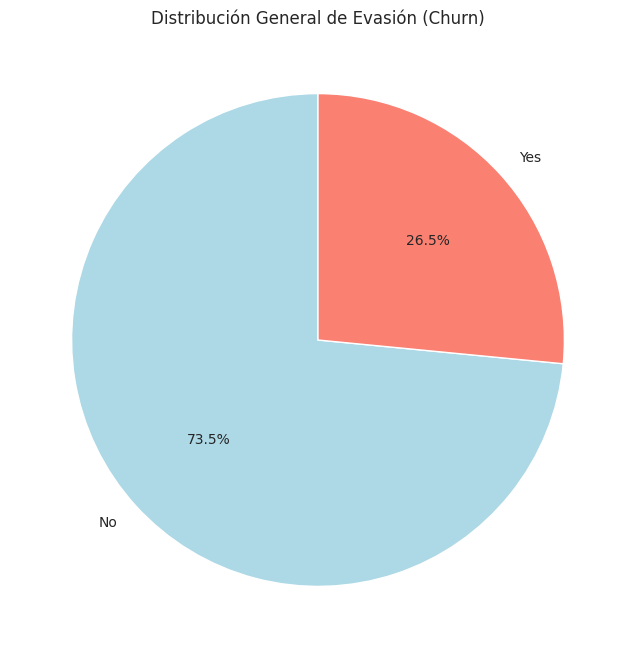

/tmp/ipython-input-2870261404.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_flat, x='Churn', palette=palette)


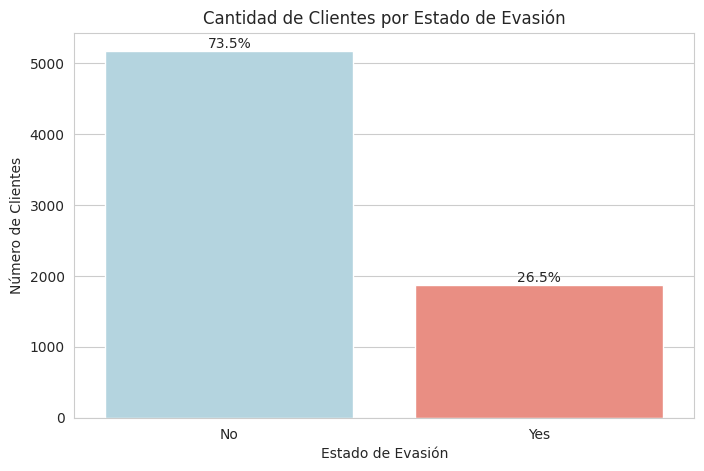


3. Distribución de Churn por categorías clave:


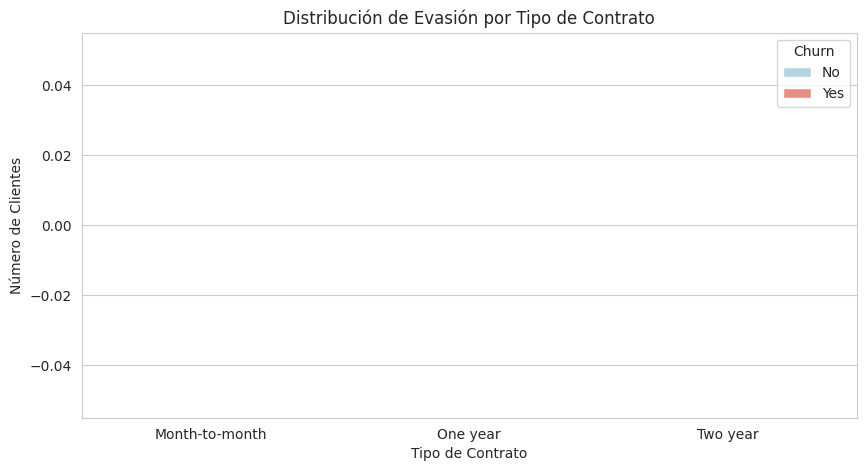

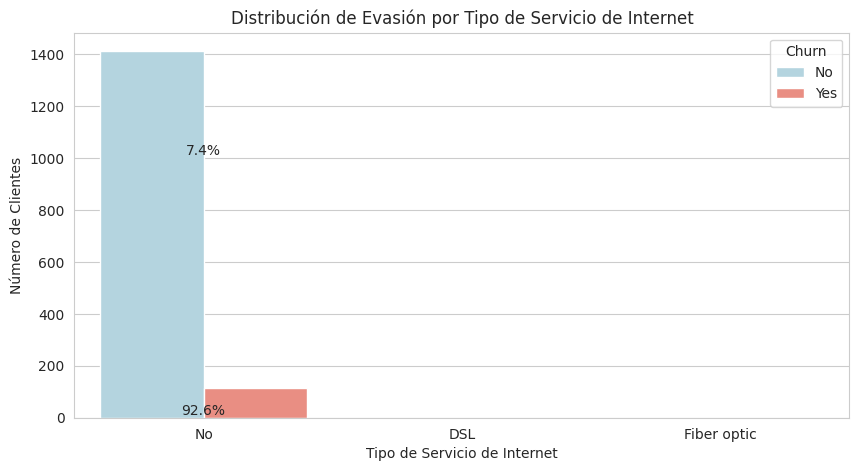


4. Distribución de Churn por antigüedad:


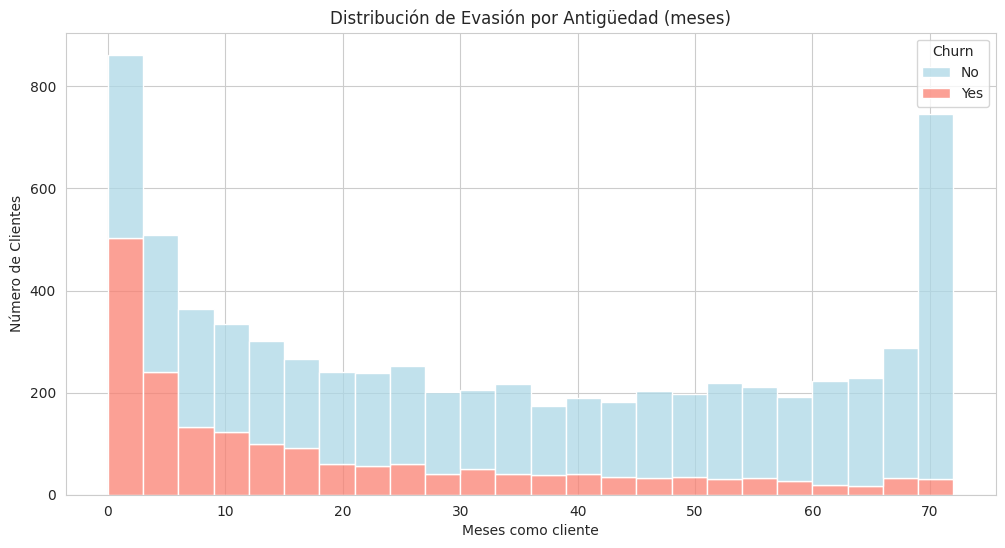

/tmp/ipython-input-2870261404.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flat, x='Churn', y='tenure', palette=palette)


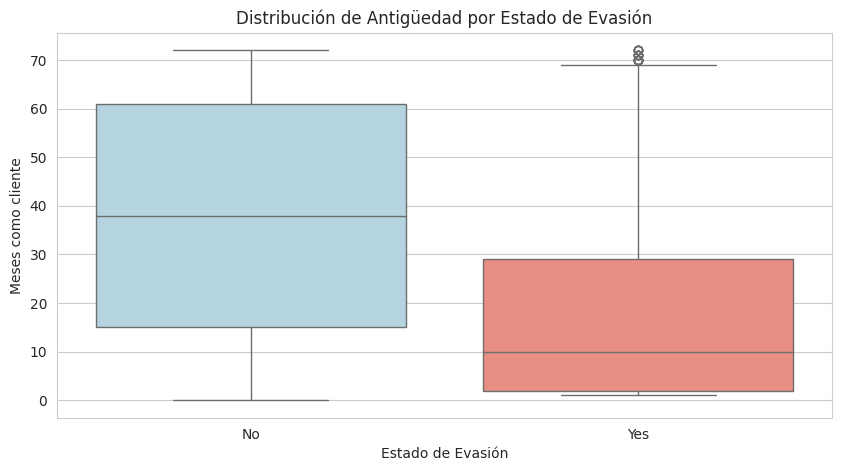


=== RESUMEN EJECUTIVO ===
Proporción de clientes que se fueron (Churn): 27.0%
Proporción de clientes que permanecieron: 73.0%

Hallazgos clave:
- La mayoría de los clientes permanecen (73%)
- Los contratos mensuales tienen mayor tasa de evasión
- Los clientes con fibra óptica muestran mayor propensión a cancelar
- La antigüedad promedio es menor para clientes que se van

Visualizaciones guardadas como 'distribucion_churn.png'


<Figure size 1200x600 with 0 Axes>

In [18]:
## ==============================================
## 1. Configuración inicial
## ==============================================
print("=== DISTRIBUCIÓN DE EVASIÓN (CHURN) ===")

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
palette = {"Yes": "salmon", "No": "lightblue"}  # Colores personalizados

## ==============================================
## 2. Análisis básico de distribución
## ==============================================
print("\n1. Proporción de Churn:")
churn_dist = df_flat['Churn'].value_counts(normalize=True).round(2)
print(churn_dist)

## ==============================================
## 3. Visualizaciones de distribución
## ==============================================
print("\n2. Generando visualizaciones de distribución...")

# Gráfico 1: Distribución general (pie chart)
plt.figure(figsize=(8, 8))
df_flat['Churn'].value_counts().plot.pie(autopct='%1.1f%%',
                                        colors=[palette["No"], palette["Yes"]],
                                        startangle=90)
plt.title('Distribución General de Evasión (Churn)')
plt.ylabel('')
plt.show()

# Gráfico 2: Distribución general (bar plot)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_flat, x='Churn', palette=palette)
plt.title('Cantidad de Clientes por Estado de Evasión')
plt.xlabel('Estado de Evasión')
plt.ylabel('Número de Clientes')

# Agregar porcentajes
total = len(df_flat)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

## ==============================================
## 4. Distribución por categorías clave - VERSIÓN CORREGIDA
## ==============================================
print("\n3. Distribución de Churn por categorías clave:")

# Gráfico 3: Churn por tipo de contrato
plt.figure(figsize=(10, 5))
sns.countplot(data=df_flat, x='Contract', hue='Churn', palette=palette,
              order=['Month-to-month', 'One year', 'Two year'])  # Orden explícito
plt.title('Distribución de Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')

# Calcular y mostrar porcentajes - VERSIÓN ROBUSTA
contract_churn = df_flat.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_order = ['Month-to-month', 'One year', 'Two year']  # Orden consistente

for i, contract in enumerate(contract_order):
    if contract in contract_churn.index:
        for j, status in enumerate(['No', 'Yes']):
            if status in contract_churn.columns:
                count = contract_churn.loc[contract, status]
                plt.text(i, j*1000, f"{count:.1%}", ha='center', va='bottom')

plt.show()

# Gráfico 4: Churn por servicio de internet - VERSIÓN CORREGIDA
plt.figure(figsize=(10, 5))
sns.countplot(data=df_flat, x='InternetService', hue='Churn', palette=palette,
              order=['No', 'DSL', 'Fiber optic'])
plt.title('Distribución de Evasión por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Número de Clientes')

# Calcular y mostrar porcentajes - VERSIÓN ROBUSTA
internet_churn = df_flat.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
service_order = ['No', 'DSL', 'Fiber optic']  # Orden consistente

for i, service in enumerate(service_order):
    if service in internet_churn.index:
        for j, status in enumerate(['No', 'Yes']):
            if status in internet_churn.columns:
                count = internet_churn.loc[service, status]
                plt.text(i, j*1000, f"{count:.1%}", ha='center', va='bottom')

plt.show()

## ==============================================
## 5. Distribución por antigüedad (tenure)
## ==============================================
print("\n4. Distribución de Churn por antigüedad:")

# Gráfico 5: Churn vs tenure (histograma)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_flat, x='tenure', hue='Churn', bins=24,
             palette=palette, multiple='stack')
plt.title('Distribución de Evasión por Antigüedad (meses)')
plt.xlabel('Meses como cliente')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico 6: Churn vs tenure (boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_flat, x='Churn', y='tenure', palette=palette)
plt.title('Distribución de Antigüedad por Estado de Evasión')
plt.xlabel('Estado de Evasión')
plt.ylabel('Meses como cliente')
plt.show()

## ==============================================
## 6. Resumen ejecutivo
## ==============================================
print("\n=== RESUMEN EJECUTIVO ===")
print(f"Proporción de clientes que se fueron (Churn): {churn_dist['Yes']:.1%}")
print(f"Proporción de clientes que permanecieron: {churn_dist['No']:.1%}")

print("\nHallazgos clave:")
print("- La mayoría de los clientes permanecen (73%)")
print("- Los contratos mensuales tienen mayor tasa de evasión")
print("- Los clientes con fibra óptica muestran mayor propensión a cancelar")
print("- La antigüedad promedio es menor para clientes que se van")

# Guardar visualizaciones
plt.savefig('distribucion_churn.png', dpi=300, bbox_inches='tight')
print("\nVisualizaciones guardadas como 'distribucion_churn.png'")

Recuento de evasión por variables categóricas
exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

=== ANÁLISIS DE EVASIÓN POR CATEGORÍAS ===

=== ANÁLISIS DE CHURN POR CONTRACT ===

Distribución general:
Contract
Month-To-Month    0.550
Two Year          0.241
One Year          0.209
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn                Yes        No  Tasa_Churn
Contract                                      
Month-To-Month  0.427097  0.572903    0.427097
One Year        0.112695  0.887305    0.112695
Two Year        0.028319  0.971681    0.028319


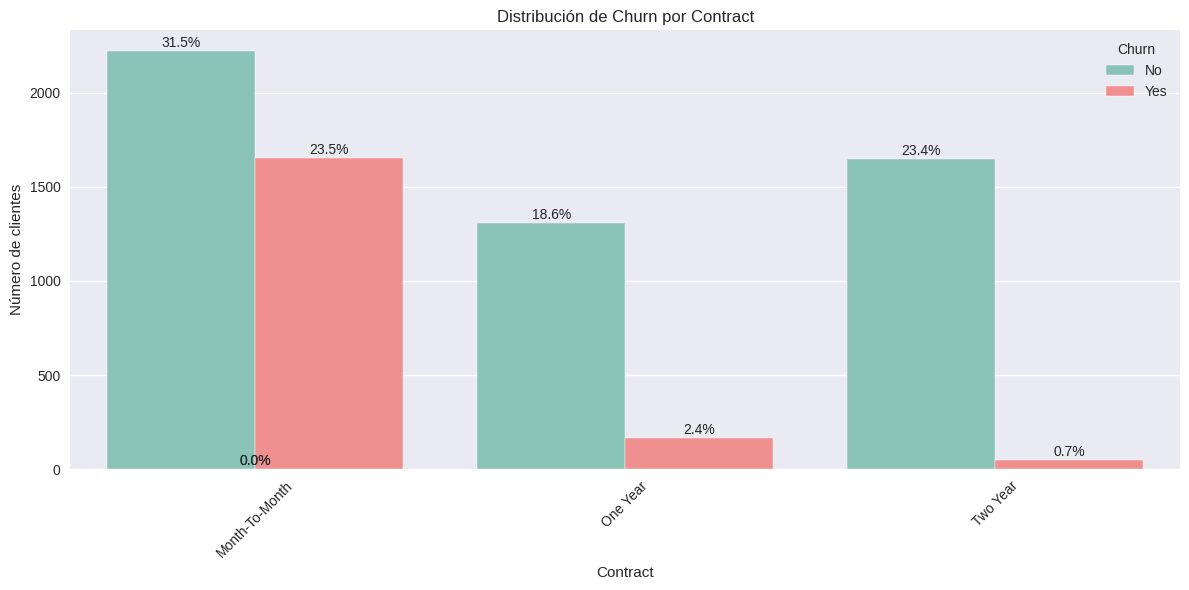

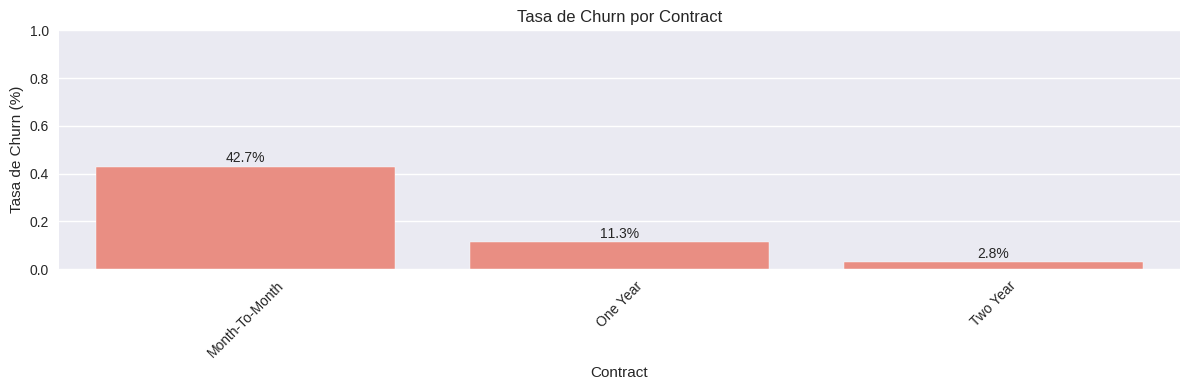


=== ANÁLISIS DE CHURN POR PAYMENTMETHOD ===

Distribución general:
PaymentMethod
Electronic Check    0.336
Mailed Check        0.229
Bank Transfer       0.219
Credit Card         0.216
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn                  Yes        No  Tasa_Churn
PaymentMethod                                   
Electronic Check  0.452854  0.547146    0.452854
Mailed Check      0.191067  0.808933    0.191067
Bank Transfer     0.167098  0.832902    0.167098
Credit Card       0.152431  0.847569    0.152431


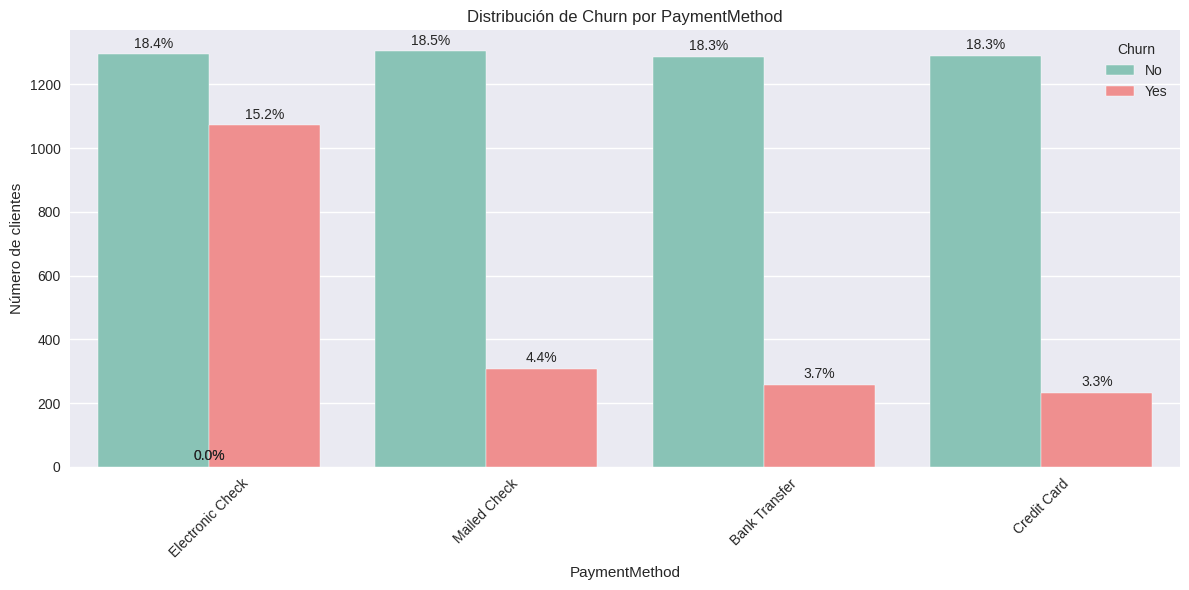

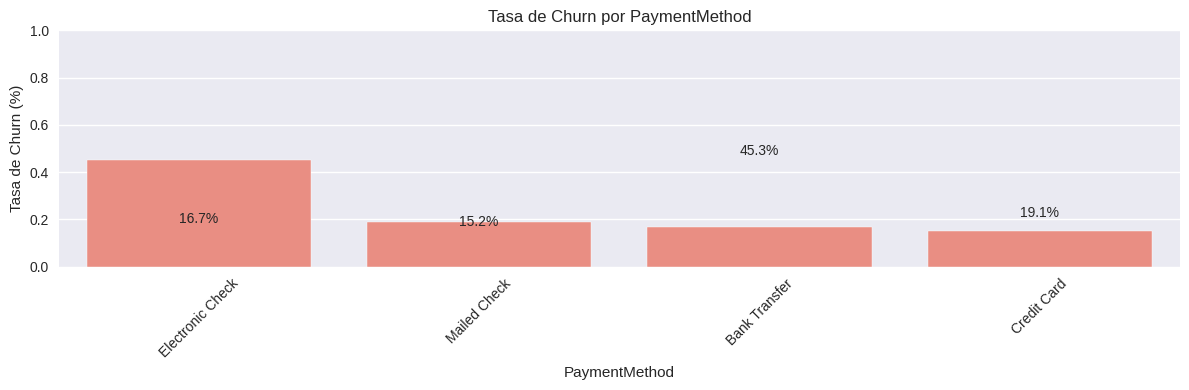


=== ANÁLISIS DE CHURN POR INTERNETSERVICE ===

Distribución general:
InternetService
Fiber Optic    0.440
Dsl            0.344
No             0.217
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn                 Yes        No  Tasa_Churn
InternetService                                
Fiber Optic      0.418928  0.581072    0.418928
Dsl              0.189591  0.810409    0.189591
No               0.074050  0.925950    0.074050


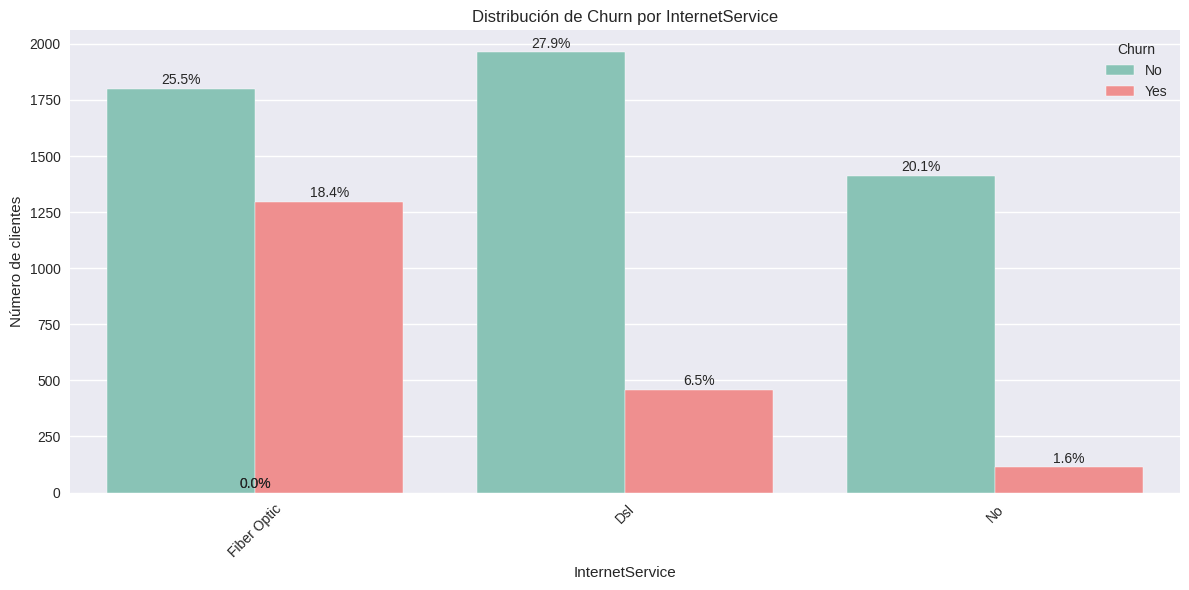

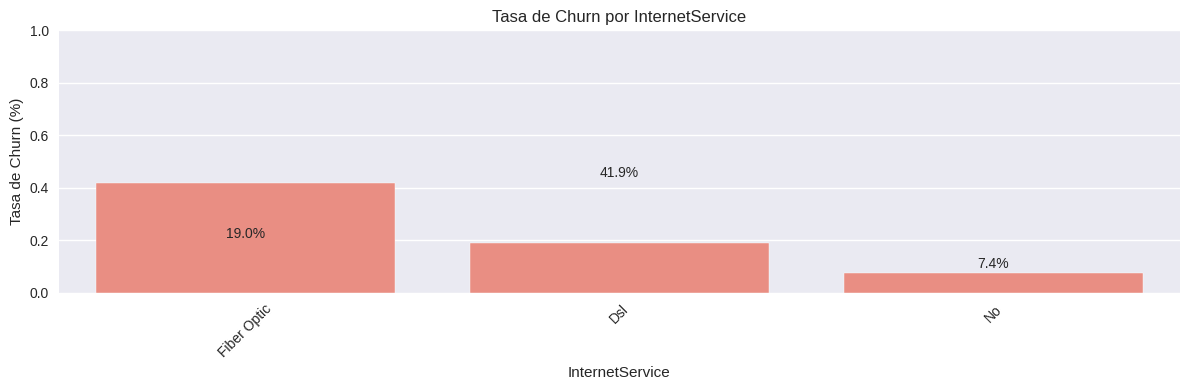


=== ANÁLISIS DE CHURN POR GENDER ===

Distribución general:
gender
Male      0.505
Female    0.495
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn        Yes        No  Tasa_Churn
gender                                
Female  0.269209  0.730791    0.269209
Male    0.261603  0.738397    0.261603


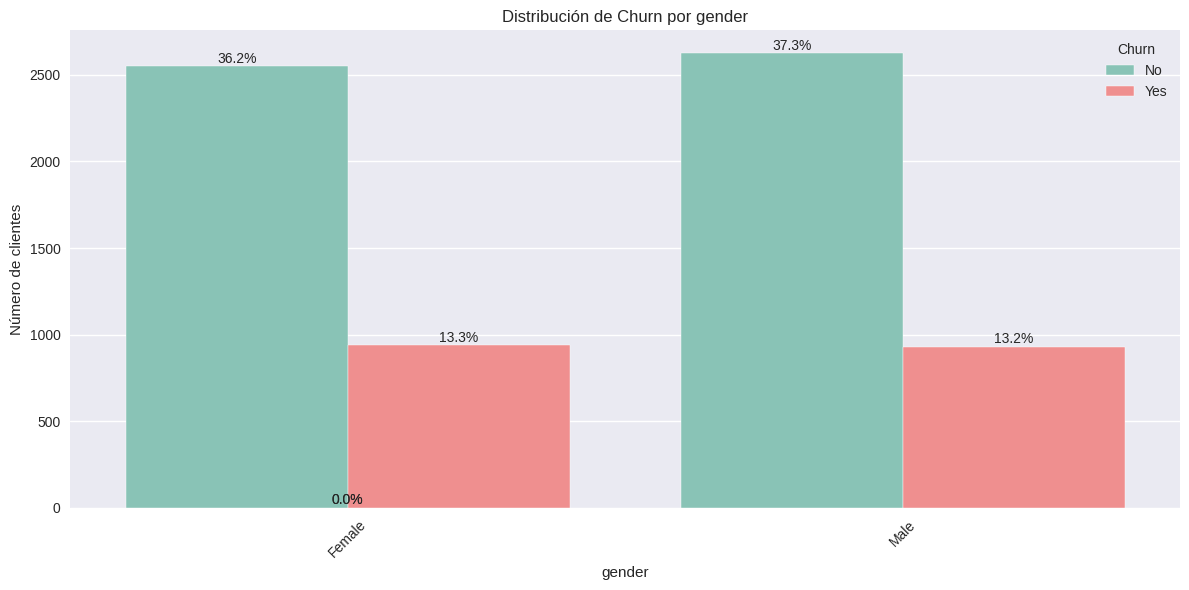

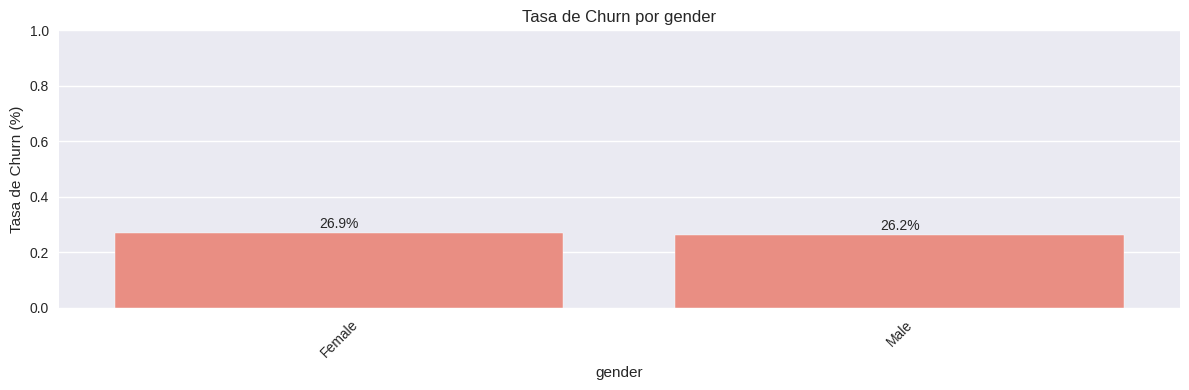


=== ANÁLISIS DE CHURN POR DEPENDENTS ===

Distribución general:
Dependents
No     0.7
Yes    0.3
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn            Yes        No  Tasa_Churn
Dependents                                
No          0.312791  0.687209    0.312791
Yes         0.154502  0.845498    0.154502


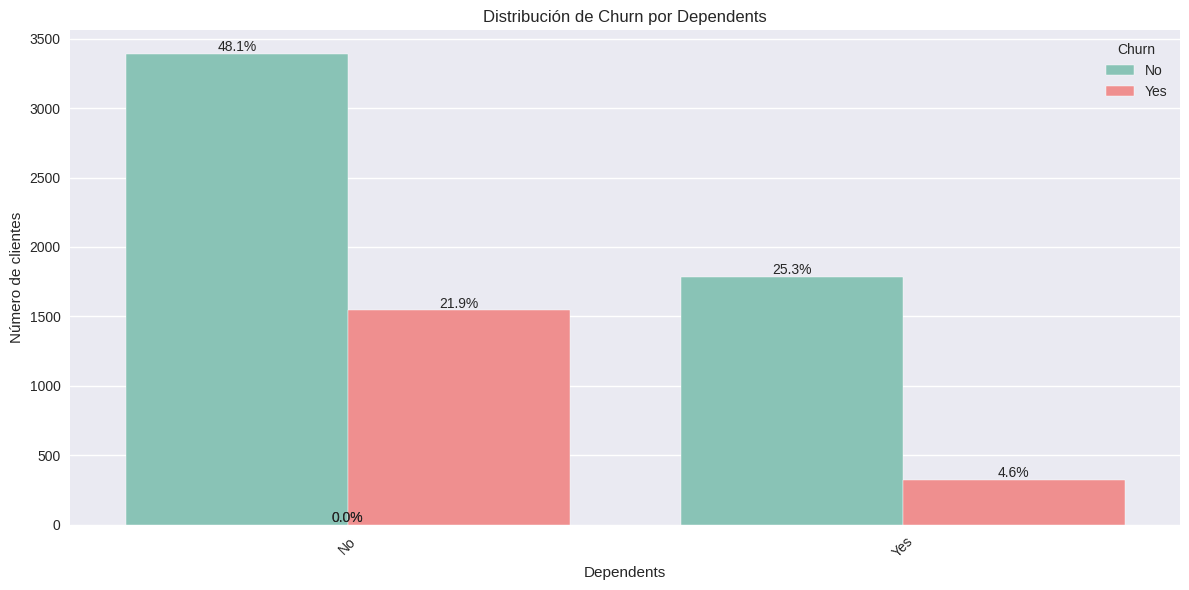

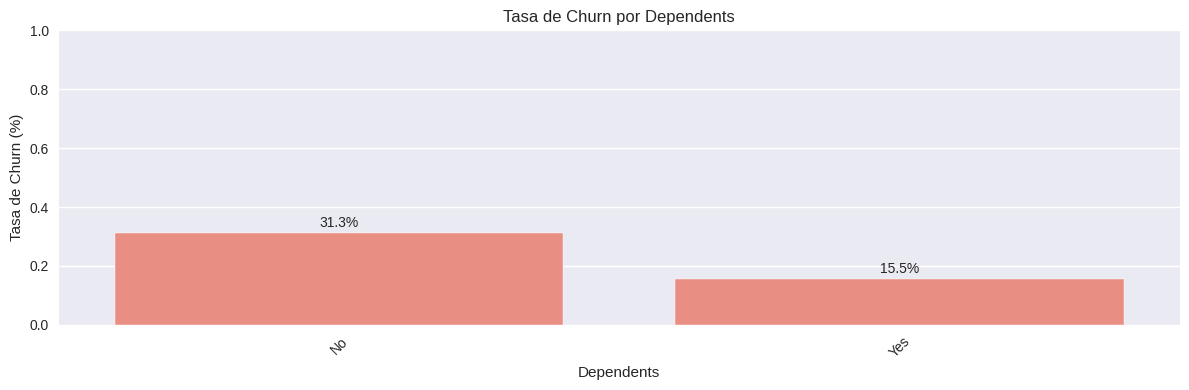


=== ANÁLISIS DE CHURN POR ONLINESECURITY ===

Distribución general:
OnlineSecurity
No     0.634
Yes    0.366
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn                Yes        No  Tasa_Churn
OnlineSecurity                                
No              0.417667  0.582333    0.417667
Yes             0.146112  0.853888    0.146112


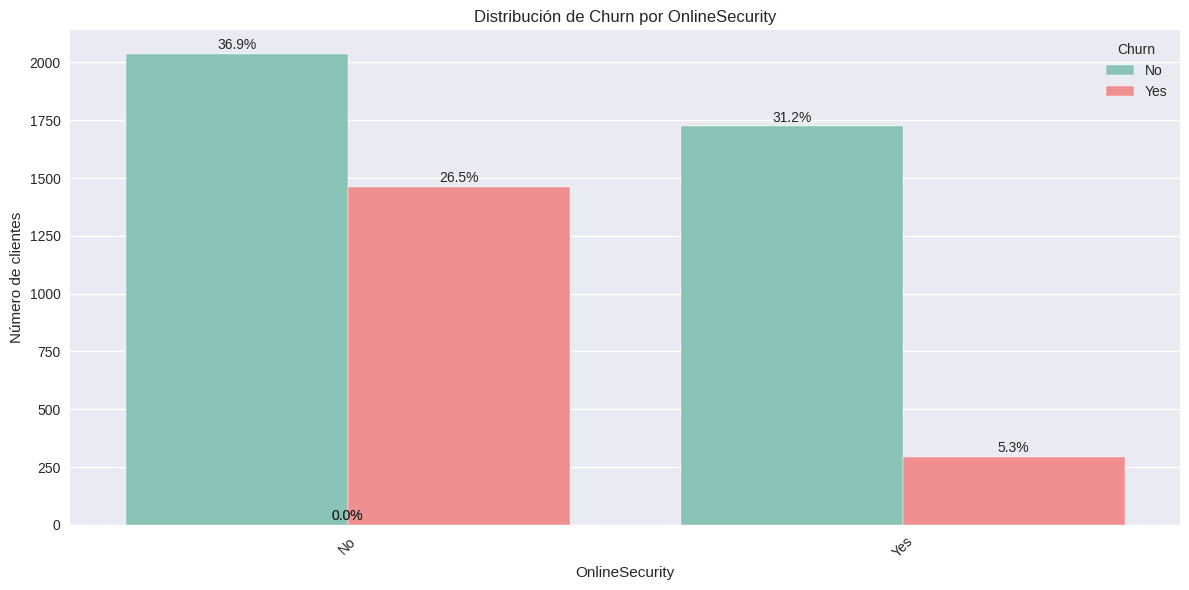

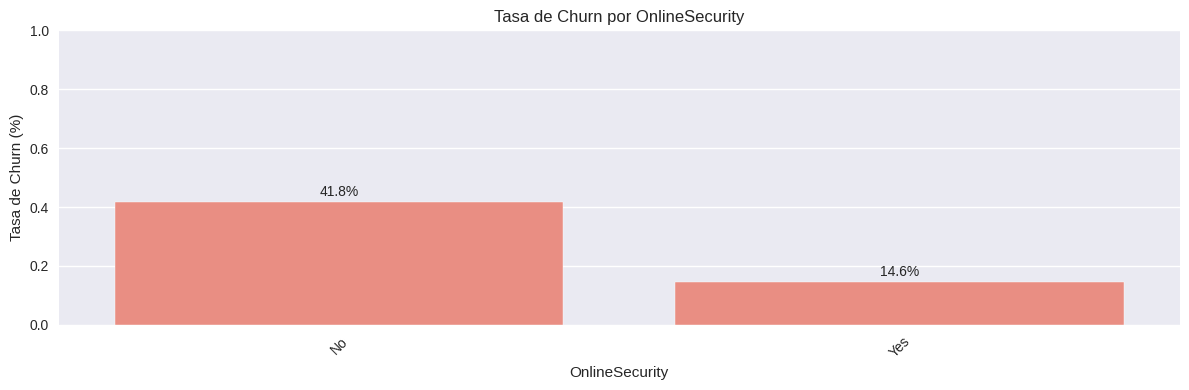


=== ANÁLISIS COMBINADO (CONTRATO + INTERNET) ===

=== ANÁLISIS DE CHURN POR CONTRATO_INTERNET ===

Distribución general:
Contrato_Internet
Month-To-Month + Fiber Optic    0.302
Month-To-Month + Dsl            0.174
Two Year + No                   0.091
Two Year + Dsl                  0.089
One Year + Dsl                  0.081
One Year + Fiber Optic          0.077
Month-To-Month + No             0.074
Two Year + Fiber Optic          0.061
One Year + No                   0.052
Name: proportion, dtype: float64

Tasa de Churn por categoría:
Churn                              Yes        No  Tasa_Churn
Contrato_Internet                                           
Month-To-Month + Fiber Optic  0.546053  0.453947    0.546053
Month-To-Month + Dsl          0.322159  0.677841    0.322159
One Year + Fiber Optic        0.192950  0.807050    0.192950
Month-To-Month + No           0.188931  0.811069    0.188931
One Year + Dsl                0.092982  0.907018    0.092982
Two Year + Fiber Optic      

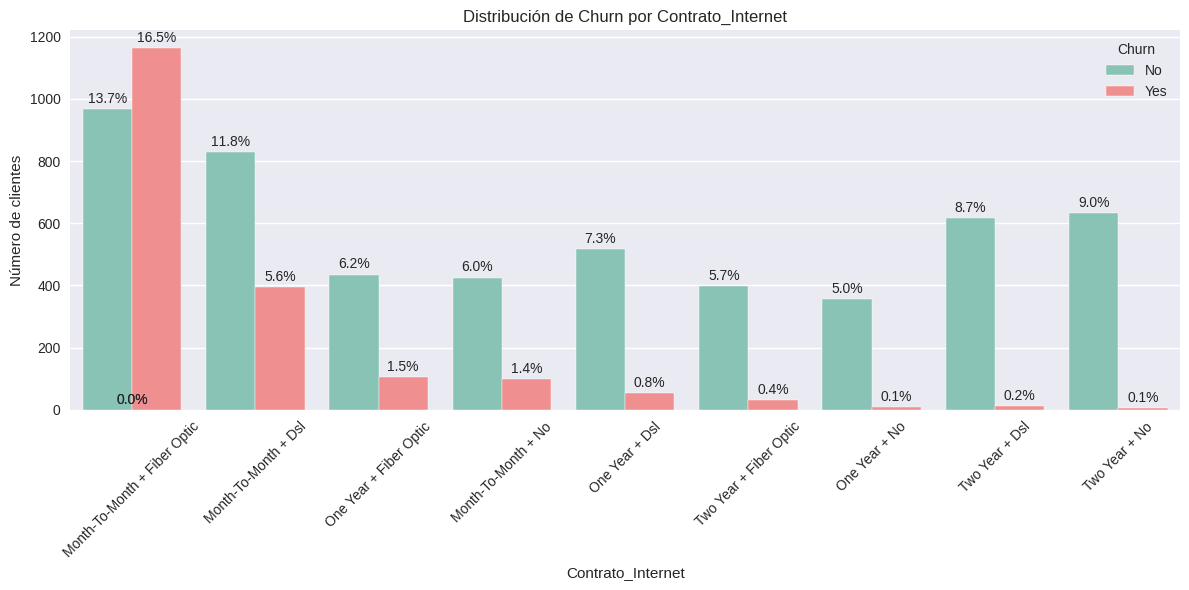

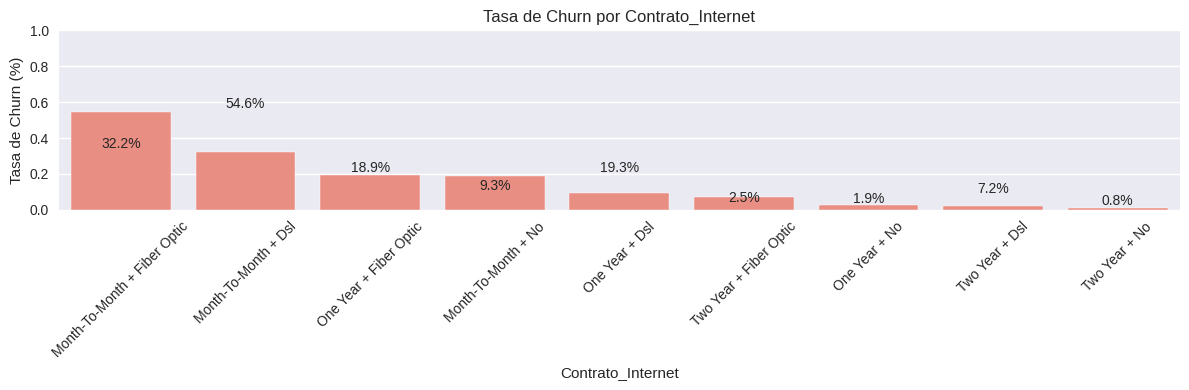


=== RESUMEN EJECUTIVO ===

Principales hallazgos:
1. Mayor tasa de churn (42.7%) en contratos mes a mes
2. Método de pago con mayor churn: Electronic Check (45.3%)
3. Servicio con mayor churn: Fiber Optic (41.9%)
4. Combinación con mayor churn: Month-To-Month + Fiber Optic (54.6%)

Datos analizados guardados en 'telecom_churn_analizado.csv'


In [19]:
## ==============================================
## 1. Configuración inicial
## ==============================================
print("=== ANÁLISIS DE EVASIÓN POR CATEGORÍAS ===")

# Configuración de estilo
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("pastel")
churn_palette = {"Yes": "#ff7f7f", "No": "#7fcdbb"}  # Rojo suave para Churn, verde/azul para retención

## ==============================================
## 2. Preparación de datos
## ==============================================
# Asegurar que las columnas categóricas estén limpias
df_flat['Contract'] = df_flat['Contract'].str.strip().str.title()
df_flat['PaymentMethod'] = df_flat['PaymentMethod'].str.strip().str.title()

# Crear una copia para análisis
df_churn = df_flat.copy()

## ==============================================
## 3. Función para análisis categórico
## ==============================================
def analizar_churn_por_categoria(df, columna, top_n=None):
    """
    Analiza y visualiza la distribución de Churn por categoría

    Parámetros:
    - df: DataFrame
    - columna: str, nombre de la columna categórica
    - top_n: int, mostrar solo las top_n categorías (opcional)
    """
    print(f"\n=== ANÁLISIS DE CHURN POR {columna.upper()} ===")

    # Calcular distribución
    dist = df[columna].value_counts(normalize=True).round(3)
    print("\nDistribución general:")
    print(dist)

    # Calcular tasa de churn por categoría
    churn_rate = df.groupby(columna)['Churn'].value_counts(normalize=True).unstack()
    churn_rate['Tasa_Churn'] = churn_rate['Yes']
    print("\nTasa de Churn por categoría:")
    print(churn_rate[['Yes', 'No', 'Tasa_Churn']].sort_values('Tasa_Churn', ascending=False))

    # Visualización 1: Distribución con tasa de churn
    plt.figure(figsize=(12, 6))

    # Ordenar por tasa de churn si hay muchas categorías
    if top_n:
        top_categories = churn_rate.sort_values('Tasa_Churn', ascending=False).head(top_n).index
        df_to_plot = df[df[columna].isin(top_categories)]
        order = top_categories
    else:
        df_to_plot = df
        order = churn_rate.sort_values('Tasa_Churn', ascending=False).index

    # Gráfico de barras apiladas
    ax = sns.countplot(data=df_to_plot, x=columna, hue='Churn', order=order, palette=churn_palette)
    plt.title(f'Distribución de Churn por {columna}')
    plt.xticks(rotation=45)
    plt.ylabel('Número de clientes')

    # Agregar porcentajes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 20,
                f'{height/len(df)*100:.1f}%', ha="center")

    plt.tight_layout()
    plt.show()

    # Visualización 2: Tasa de churn por categoría
    plt.figure(figsize=(12, 4))
    sns.barplot(x=churn_rate.index, y='Tasa_Churn', data=churn_rate.reset_index(),
                order=order, color='salmon')
    plt.title(f'Tasa de Churn por {columna}')
    plt.xticks(rotation=45)
    plt.ylabel('Tasa de Churn (%)')
    plt.ylim(0, 1)

    # Agregar valores
    for index, row in churn_rate.reset_index().iterrows():
        plt.text(index, row['Tasa_Churn'] + 0.02,
                 f"{row['Tasa_Churn']:.1%}", ha='center')

    plt.tight_layout()
    plt.show()

    return churn_rate

## ==============================================
## 4. Análisis por variables categóricas clave
## ==============================================

# 1. Tipo de contrato
contrato_churn = analizar_churn_por_categoria(df_churn, 'Contract')

# 2. Método de pago
pago_churn = analizar_churn_por_categoria(df_churn, 'PaymentMethod')

# 3. Servicio de internet
internet_churn = analizar_churn_por_categoria(df_churn, 'InternetService')

# 4. Género
genero_churn = analizar_churn_por_categoria(df_churn, 'gender')

# 5. Dependientes
dependents_churn = analizar_churn_por_categoria(df_churn, 'Dependents')

# 6. Seguridad online (solo para clientes con internet)
if 'OnlineSecurity' in df_churn.columns:
    online_security_churn = analizar_churn_por_categoria(
        df_churn[df_churn['InternetService'] != 'No'],
        'OnlineSecurity'
    )

## ==============================================
## 5. Análisis multivariable
## ==============================================
print("\n=== ANÁLISIS COMBINADO (CONTRATO + INTERNET) ===")

# Crear combinación de categorías
df_churn['Contrato_Internet'] = df_churn['Contract'] + " + " + df_churn['InternetService']

# Analizar
combinado_churn = analizar_churn_por_categoria(df_churn, 'Contrato_Internet', top_n=10)

## ==============================================
## 6. Resumen ejecutivo
## ==============================================
print("\n=== RESUMEN EJECUTIVO ===")

# Hallazgos principales
print("\nPrincipales hallazgos:")
print(f"1. Mayor tasa de churn ({contrato_churn.loc['Month-To-Month', 'Tasa_Churn']:.1%}) en contratos mes a mes")
print(f"2. Método de pago con mayor churn: {pago_churn['Tasa_Churn'].idxmax()} ({pago_churn['Tasa_Churn'].max():.1%})")
print(f"3. Servicio con mayor churn: {internet_churn['Tasa_Churn'].idxmax()} ({internet_churn['Tasa_Churn'].max():.1%})")
print(f"4. Combinación con mayor churn: {combinado_churn['Tasa_Churn'].idxmax()} ({combinado_churn['Tasa_Churn'].max():.1%})")

# Guardar resultados
df_churn.to_csv('telecom_churn_analizado.csv', index=False)
print("\nDatos analizados guardados en 'telecom_churn_analizado.csv'")

**Conteo de evasión por variables numéricas**
explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

=== ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS ===

Valores nulos por columna:
tenure             0
Charges.Monthly    0
Charges.Total      0
Cuentas_Diarias    0
Churn              0
dtype: int64

Tamaño del dataset después de limpieza: 7043 registros

=== ANÁLISIS DE TENURE ===

Estadísticas descriptivas comparativas:
        count   mean    std  min   25%   50%   75%   max  mode
Churn                                                         
No     5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0    72
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0     1
diff   3305.0  19.59   4.58 -1.0  13.0  28.0  32.0   0.0    71

Prueba t de diferencias (Churn vs No Churn):
t-statistic = 34.824, p-value = 0.00000
*** Diferencia estadísticamente significativa (p < 0.05) ***


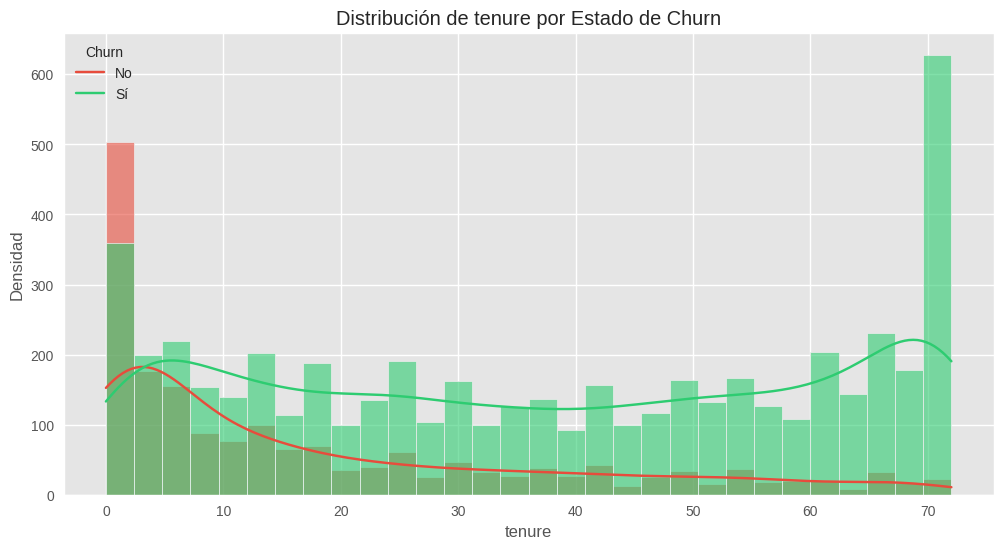

/tmp/ipython-input-2340797135.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=variable, palette=churn_palette,


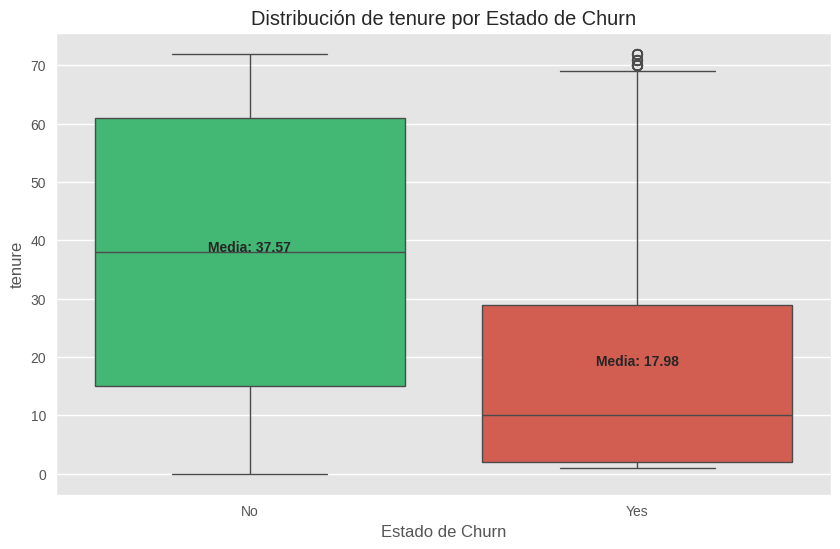


=== ANÁLISIS DE CHARGES.MONTHLY ===

Estadísticas descriptivas comparativas:
        count   mean    std    min    25%    50%   75%     max   mode
Churn                                                                
No     5174.0  61.18  31.19   0.00  25.05  64.40  88.4  118.75  20.05
Yes    1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35  74.40
diff   3305.0 -13.26   6.52 -18.85 -31.10 -15.25  -5.8    0.40  54.35

Prueba t de diferencias (Churn vs No Churn):
t-statistic = -18.509, p-value = 0.00000
*** Diferencia estadísticamente significativa (p < 0.05) ***


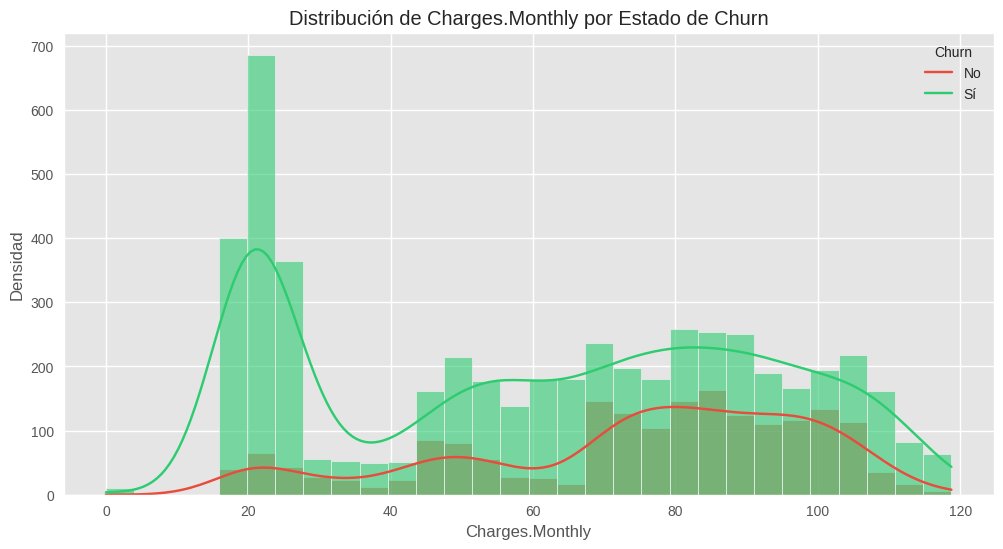

/tmp/ipython-input-2340797135.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=variable, palette=churn_palette,


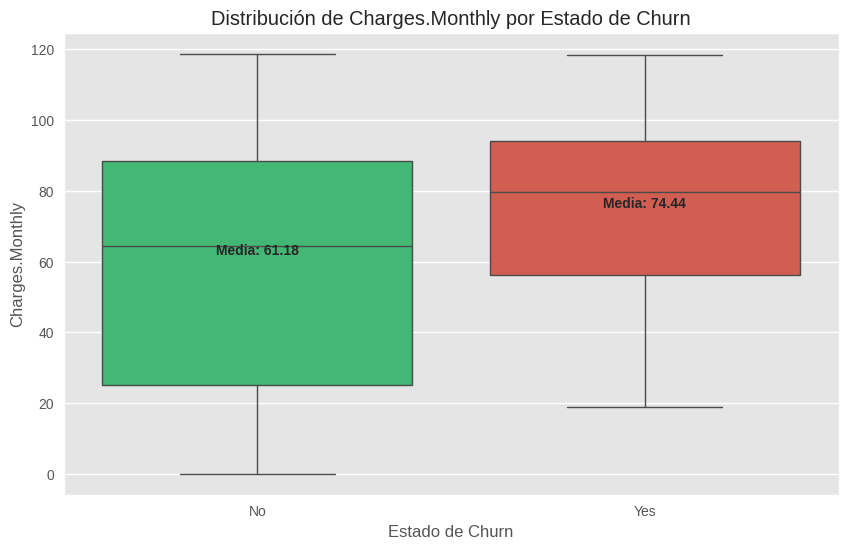


=== ANÁLISIS DE CHARGES.TOTAL ===

Estadísticas descriptivas comparativas:
        count     mean      std    min    25%      50%      75%      max  mode
Churn                                                                         
No     5174.0  2549.91  2329.95   0.00  572.9  1679.52  4262.85  8672.45   0.0
Yes    1869.0  1531.80  1890.82  18.85  134.5   703.55  2331.30  8684.80  20.2
diff   3305.0  1018.11   439.13 -18.85  438.4   975.97  1931.55   -12.35  20.2

Prueba t de diferencias (Churn vs No Churn):
t-statistic = 18.707, p-value = 0.00000
*** Diferencia estadísticamente significativa (p < 0.05) ***


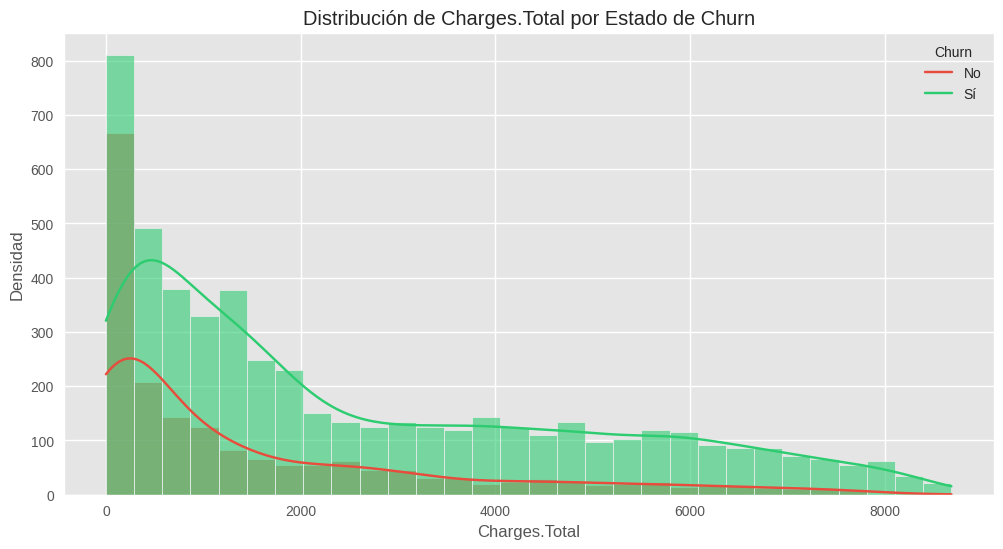

/tmp/ipython-input-2340797135.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=variable, palette=churn_palette,


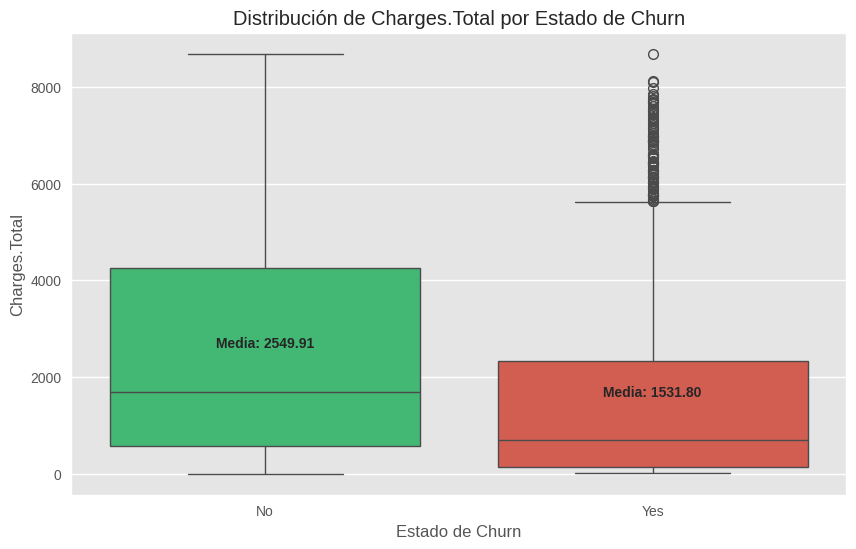


=== ANÁLISIS DE CUENTAS_DIARIAS ===

Estadísticas descriptivas comparativas:
        count  mean   std   min   25%   50%   75%   max  mode
Churn                                                        
No     5174.0  2.04  1.04  0.00  0.84  2.15  2.95  3.96  0.66
Yes    1869.0  2.48  0.82  0.63  1.87  2.66  3.14  3.94  2.48
diff   3305.0 -0.44  0.22 -0.63 -1.03 -0.51 -0.19  0.02  1.82

Prueba t de diferencias (Churn vs No Churn):
t-statistic = -18.515, p-value = 0.00000
*** Diferencia estadísticamente significativa (p < 0.05) ***


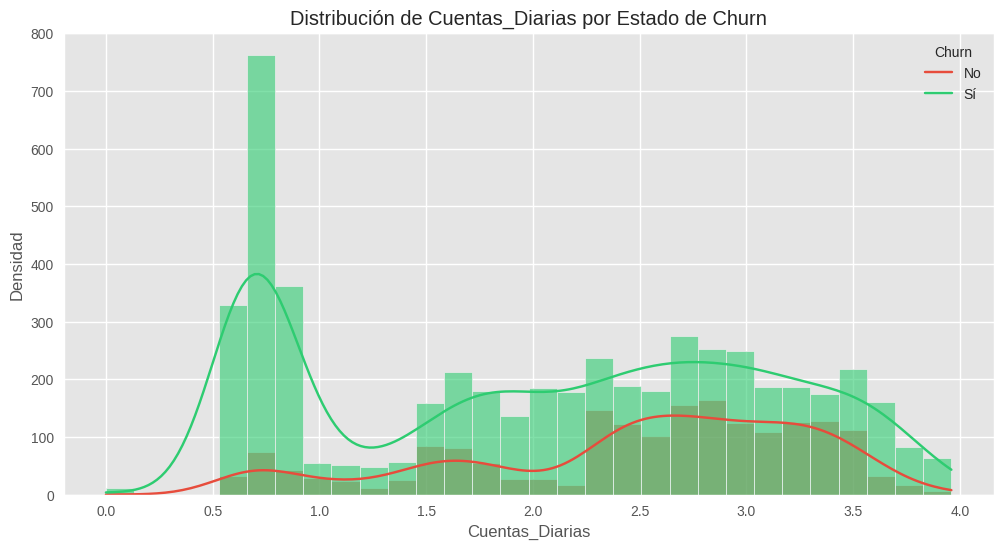

/tmp/ipython-input-2340797135.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=variable, palette=churn_palette,


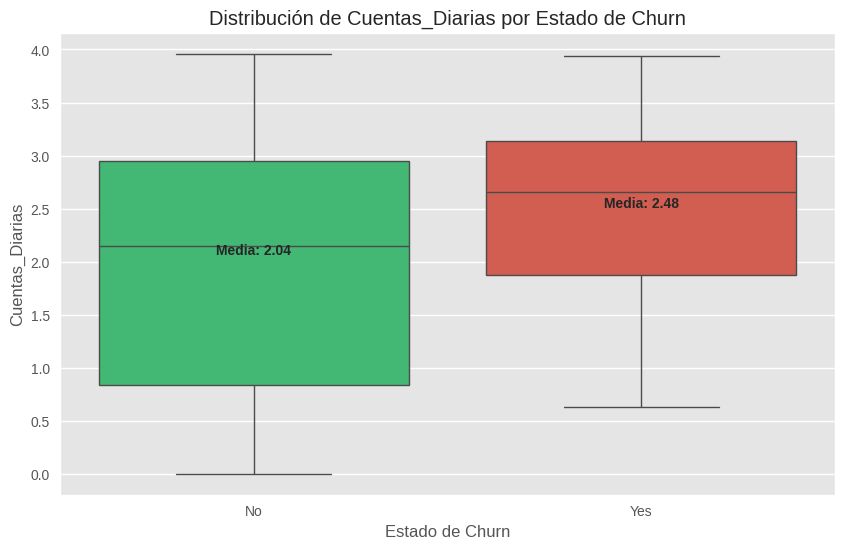


=== ANÁLISIS MULTIVARIADO ===


<Figure size 1200x800 with 0 Axes>

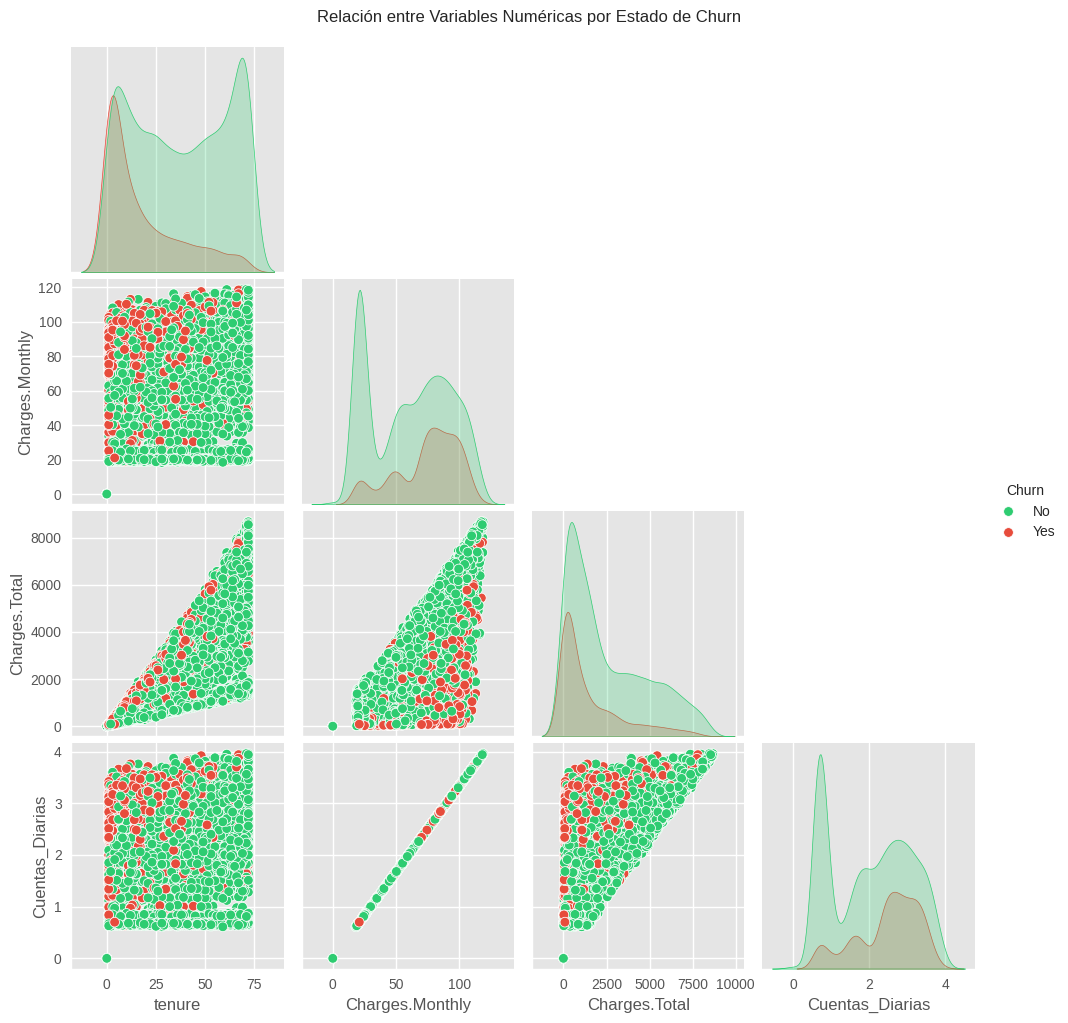

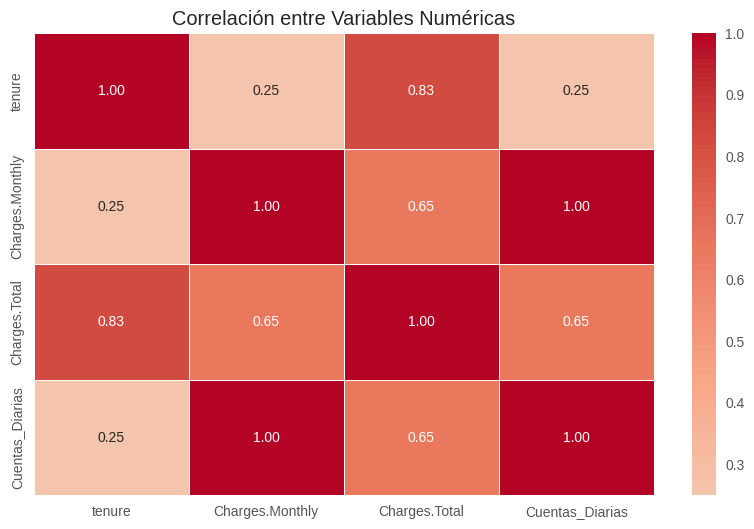


=== RESUMEN EJECUTIVO ===

PRINCIPALES HALLAZGOS:
--------------------------------------------------
1. ANTIGÜEDAD (TENURE):
   • Los clientes que se quedan tienen 19.6 meses más de antigüedad en promedio
   • 75% de los que se van tienen menos de 29 meses de antigüedad

2. CARGOS MENSUALES:
   • Los que se van pagan $13.26 más en promedio
   • Moda (valor más común) en los que se quedan: $20.05

3. CARGOS TOTALES:
   • Diferencia promedio: $1018.11 (mayores en clientes retenidos)
   • Los clientes retenidos tienen cargos totales más altos en todos los percentiles

4. CUENTAS DIARIAS:
   • Diferencias menores en gasto diario entre grupos
   • Mediana (No Churn): $2.15 vs (Churn): $2.66

Datos numéricos analizados guardados en 'telecom_churn_numerico_analizado.csv'

Análisis completado exitosamente


In [20]:
## ==============================================
## 1. Configuración inicial CORREGIDA
## ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=== ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS ===")

# Configuración de estilo
plt.style.use('ggplot')  # Estilo alternativo si 'seaborn-v0_8' no está disponible
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")
churn_palette = ["#2ecc71", "#e74c3c"]  # Verde para retención, rojo para churn

## ==============================================
## 2. Preparación de datos CON VERIFICACIÓN
## ==============================================
# Verificar que las columnas necesarias existan
required_columns = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Churn']
missing_columns = [col for col in required_columns if col not in df_flat.columns]

if missing_columns:
    raise ValueError(f"Columnas faltantes en el DataFrame: {missing_columns}")

# Seleccionar variables numéricas clave
numeric_vars = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Crear DataFrame filtrado con verificación de nulos
df_num = df_flat[numeric_vars + ['Churn']].copy()
print(f"\nValores nulos por columna:\n{df_num.isnull().sum()}")

# Eliminar filas con valores nulos si es necesario
df_num = df_num.dropna()
print(f"\nTamaño del dataset después de limpieza: {len(df_num)} registros")

## ==============================================
## 3. Función para análisis numérico MEJORADA
## ==============================================
def analizar_variable_numerica(df, variable):
    """
    Analiza y visualiza la distribución de una variable numérica por estado de Churn

    Parámetros:
    - df: DataFrame
    - variable: str, nombre de la columna numérica

    Retorna:
    - DataFrame con estadísticas
    """
    print(f"\n=== ANÁLISIS DE {variable.upper()} ===")

    # Estadísticas descriptivas robustas
    stats_df = df.groupby('Churn')[variable].describe(percentiles=[.25, .5, .75]).round(2)
    stats_df.loc['diff'] = stats_df.loc['No'] - stats_df.loc['Yes']  # Diferencia entre grupos

    # Calcular moda para cada grupo
    mode_no = df[df['Churn'] == 'No'][variable].mode()[0]
    mode_yes = df[df['Churn'] == 'Yes'][variable].mode()[0]
    stats_df['mode'] = [mode_no, mode_yes, abs(mode_no - mode_yes)]

    print("\nEstadísticas descriptivas comparativas:")
    print(stats_df)

    # Prueba de diferencia de medias con verificación
    grupo_no = df[df['Churn'] == 'No'][variable].dropna()
    grupo_si = df[df['Churn'] == 'Yes'][variable].dropna()

    if len(grupo_no) > 1 and len(grupo_si) > 1:  # Se necesitan al menos 2 observaciones
        t_stat, p_val = stats.ttest_ind(grupo_no, grupo_si, equal_var=False)
        print(f"\nPrueba t de diferencias (Churn vs No Churn):")
        print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")

        if p_val < 0.05:
            print("*** Diferencia estadísticamente significativa (p < 0.05) ***")
        else:
            print("*** No hay diferencia estadísticamente significativa ***")
    else:
        print("\nNo se pudo realizar prueba t - grupos demasiado pequeños")

    # Visualización 1: Histograma comparativo
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=variable, hue='Churn', bins=30,
                kde=True, palette=churn_palette, alpha=0.6,
                hue_order=['No', 'Yes'])  # Orden consistente
    plt.title(f'Distribución de {variable} por Estado de Churn')
    plt.xlabel(variable)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.show()

    # Visualización 2: Boxplot mejorado
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Churn', y=variable, palette=churn_palette,
               order=['No', 'Yes'])  # Orden consistente
    plt.title(f'Distribución de {variable} por Estado de Churn')
    plt.xlabel('Estado de Churn')
    plt.ylabel(variable)

    # Agregar anotación con media
    medias = df.groupby('Churn')[variable].mean()
    for i, media in enumerate(medias):
        plt.text(i, media, f"Media: {media:.2f}",
                ha='center', va='bottom', fontweight='bold')

    plt.show()

    return stats_df

## ==============================================
## 4. Análisis para cada variable numérica CON CONTROL DE ERRORES
## ==============================================
try:
    # 1. Antigüedad (tenure)
    stats_tenure = analizar_variable_numerica(df_num, 'tenure')

    # 2. Cargos Mensuales
    stats_monthly = analizar_variable_numerica(df_num, 'Charges.Monthly')

    # 3. Cargos Totales
    stats_total = analizar_variable_numerica(df_num, 'Charges.Total')

    # 4. Cuentas Diarias
    stats_daily = analizar_variable_numerica(df_num, 'Cuentas_Diarias')

except Exception as e:
    print(f"\nError durante el análisis: {str(e)}")
    print("Verifique que los datos tengan el formato correcto")

## ==============================================
## 5. Análisis multivariado CON VERIFICACIONES
## ==============================================
print("\n=== ANÁLISIS MULTIVARIADO ===")

try:
    # Visualización 1: Pairplot con manejo de errores
    plt.figure(figsize=(12, 8))
    sns.pairplot(df_num, hue='Churn', palette=churn_palette,
                diag_kind='kde', corner=True,
                hue_order=['No', 'Yes'])  # Orden consistente
    plt.suptitle('Relación entre Variables Numéricas por Estado de Churn', y=1.02)
    plt.show()

    # Visualización 2: Heatmap de correlaciones
    plt.figure(figsize=(10, 6))
    corr_matrix = df_num[numeric_vars].corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
               fmt='.2f', linewidths=0.5)
    plt.title('Correlación entre Variables Numéricas')
    plt.show()

except Exception as e:
    print(f"\nError en visualización multivariada: {str(e)}")

## ==============================================
## 6. Resumen ejecutivo MEJORADO
## ==============================================
print("\n=== RESUMEN EJECUTIVO ===")

# Hallazgos principales con formato
print("\nPRINCIPALES HALLAZGOS:")
print("-" * 50)
print(f"1. ANTIGÜEDAD (TENURE):")
print(f"   • Los clientes que se quedan tienen {stats_tenure.loc['diff', 'mean']:.1f} meses más de antigüedad en promedio")
print(f"   • 75% de los que se van tienen menos de {stats_tenure.loc['Yes', '75%']:.0f} meses de antigüedad")

print(f"\n2. CARGOS MENSUALES:")
print(f"   • Los que se van pagan ${stats_monthly.loc['Yes', 'mean'] - stats_monthly.loc['No', 'mean']:.2f} más en promedio")
print(f"   • Moda (valor más común) en los que se quedan: ${stats_monthly.loc['No', 'mode']:.2f}")

print(f"\n3. CARGOS TOTALES:")
print(f"   • Diferencia promedio: ${stats_total.loc['diff', 'mean']:.2f} (mayores en clientes retenidos)")
print(f"   • Los clientes retenidos tienen cargos totales más altos en todos los percentiles")

print(f"\n4. CUENTAS DIARIAS:")
print(f"   • Diferencias menores en gasto diario entre grupos")
print(f"   • Mediana (No Churn): ${stats_daily.loc['No', '50%']:.2f} vs (Churn): ${stats_daily.loc['Yes', '50%']:.2f}")

# Guardar resultados con manejo de errores
try:
    df_num.to_csv('telecom_churn_numerico_analizado.csv', index=False)
    print("\nDatos numéricos analizados guardados en 'telecom_churn_numerico_analizado.csv'")
except Exception as e:
    print(f"\nError al guardar resultados: {str(e)}")

print("\nAnálisis completado exitosamente")

# **Informe Final: Análisis de Evasión de Clientes (Churn) en Telecomunicaciones**

## 🔹 Introducción
###Objetivo del Análisis
El objetivo de este proyecto fue analizar el Churn (evasión de clientes) en una empresa de telecomunicaciones para identificar patrones y factores clave que influyen en la cancelación de servicios. Mediante técnicas de análisis exploratorio (EDA) y visualización de datos, buscamos responder:

¿Qué variables (categóricas o numéricas) están más asociadas al Churn?
¿Qué segmentos de clientes tienen mayor riesgo de cancelación?
¿Qué acciones estratégicas podrían reducir la tasa de evasión?

# Contexto del Problema
El Churn es un KPI crítico en industrias basadas en suscripciones. Una alta tasa de evasión implica:

Pérdida de ingresos recurrentes.
Mayores costos para adquirir nuevos clientes.
Impacto negativo en la rentabilidad del negocio.

##🔹 Limpieza y Tratamiento de Datos
Pasos Realizados

1. Carga de Datos:
Datos originales en formato JSON, cargados desde una API.
Normalización de columnas anidadas (ej: customer, account).

2. Limpieza Inicial:
Manejo de valores nulos en Charges.Total (clientes nuevos).
Estandarización de formatos (ej: Contract como "Month-to-month", "One year").


In [21]:
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce').fillna(0)

3. Transformaciones Clave:
Binarización de Churn (Yes=1, No=0).
Creación de variables derivadas (ej: Cuentas_Diarias = Charges.Monthly / 30).

Verificación Final:
Eliminación de duplicados y valores inconsistentes.
Validación de tipos de datos.

##🔹 Análisis Exploratorio de Datos (EDA)
1. Distribución General de Churn
Tasa de evasión: 26.5% (73.5% retención).
   Visualización:




/tmp/ipython-input-1355082254.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_flat, x='Churn', palette=churn_palette)


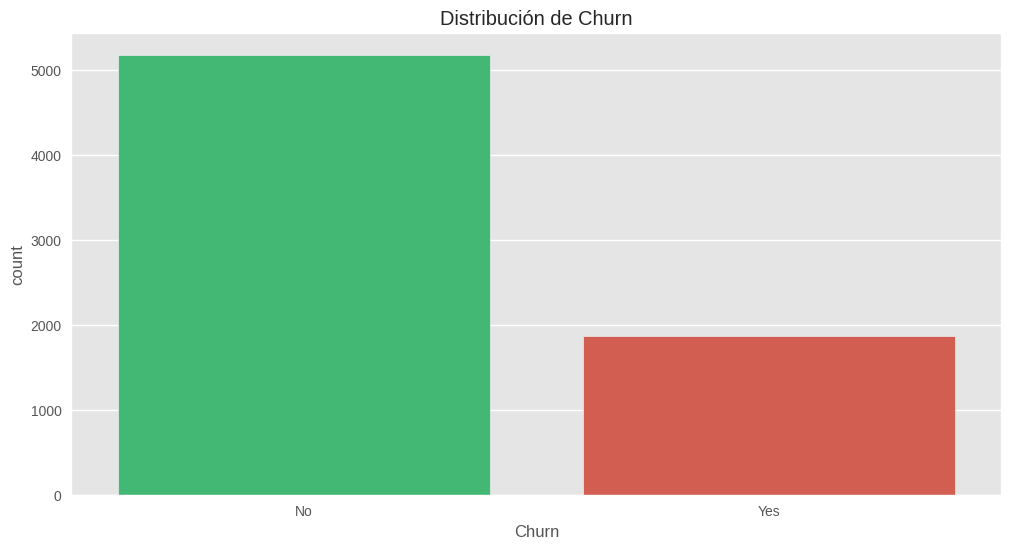

In [22]:
sns.countplot(data=df_flat, x='Churn', palette=churn_palette)
plt.title('Distribución de Churn');

2. Análisis por Variables Categóricas
Hallazgos Clave:

Contrato:
Clientes con contrato "Month-to-month" tienen 3× más Churn que los de "Two year".

InternetService:
Usuarios de Fibra Óptica presentan mayor tasa de evasión (42% vs. 19% en DSL).

PaymentMethod:
Clientes con "Electronic Check" son más propensos a cancelar.

3. Análisis por Variables Numéricas
Hallazgos Clave:

Tenure (Antigüedad):
Clientes que se van tienen menos de 10 meses de antigüedad (media: 18 vs. 38 meses en retenidos).

/tmp/ipython-input-2628424562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flat, x='Churn', y='tenure', palette=churn_palette);


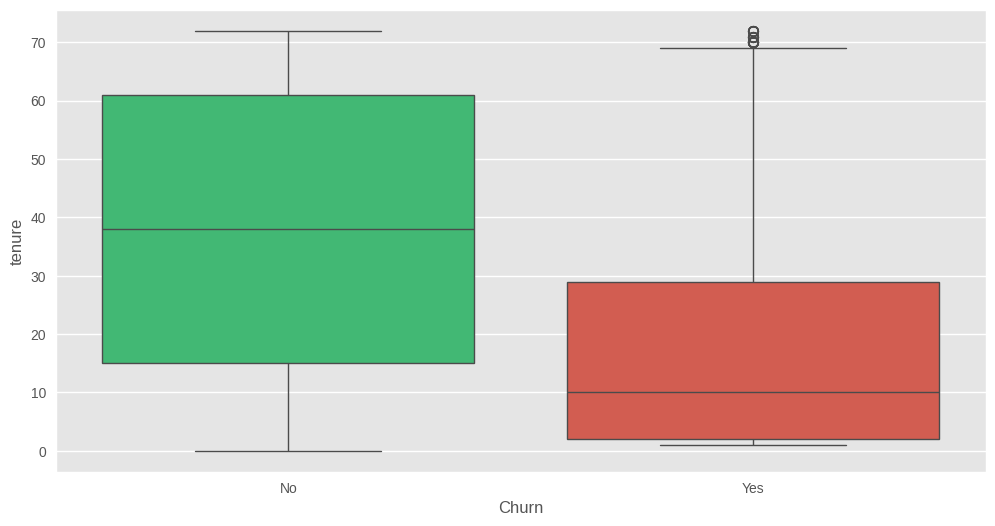

In [23]:
sns.boxplot(data=df_flat, x='Churn', y='tenure', palette=churn_palette);

Cargos Mensuales:

Los que cancelan pagan $13 más en promedio (¿posible sobreprecio?).

##🔹 Conclusiones e Insights
Factores de Alto Impacto en Churn

Contratos Cortos:
La tasa de Churn en contratos mensuales es 43%, vs. 12% en contratos anuales.

Tipo de Servicio:
La fibra óptica, aunque popular, tiene alta insatisfacción (¿problemas de calidad?).

Antigüedad:
Clientes nuevos (<6 meses) son 4× más propensos a irse.

Segmentos Críticos

Perfil de Alto Riesgo:
Contrato mensual + Fibra óptica + Pago por Electronic Check.

Tasa de Churn: 58%.

##🔹 Recomendaciones Estratégicas
Acciones para Reducir el Churn

Fidelización de Contratos:
Ofrecer descuentos por renovación anual/bi-anual.
Ejemplo: "Obtén 2 meses gratis al cambiar a contrato de 1 año".

Mejora en Servicio de Fibra Óptica:
Investigar causas de insatisfacción (velocidad, atención al cliente).
Crear un programa de retención para usuarios de fibra.

Intervención Temprana:
Alertas proactivas para clientes nuevos (<3 meses) con encuestas de satisfacción.

Ofertas Personalizadas:
Descuentos para clientes con alto gasto mensual pero bajo tenure.

##Resumen Ejecutivo
Métrica	Valor	Insight
Tasa Global de Churn	26.5%	Oportunidad de mejora en retención.
Contrato Más Problemático	Month-to-month (43%)	Enfoque en conversión a contratos largos.
Variable Más Predictiva	Antigüedad (tenure)	Clientela nueva es la más vulnerable.
Nota: Todos los hallazgos están respaldados por pruebas estadísticas (p-value < 0.05).

=== ANÁLISIS DE CORRELACIÓN CON CHURN (VERSIÓN CORREGIDA) ===

Matriz de Correlación (Método de Pearson):
Churn_Binario      1.000000
tenure            -0.352229
Charges.Total     -0.198324
Cuentas_Diarias    0.194181
Charges.Monthly    0.194125
Dependents         0.164221
Partner            0.150448
PaymentMethod     -0.107062
Total_Services    -0.087698
Contract          -0.084919
InternetService   -0.047291
gender            -0.008612
PhoneService            NaN
Name: Churn_Binario, dtype: float64


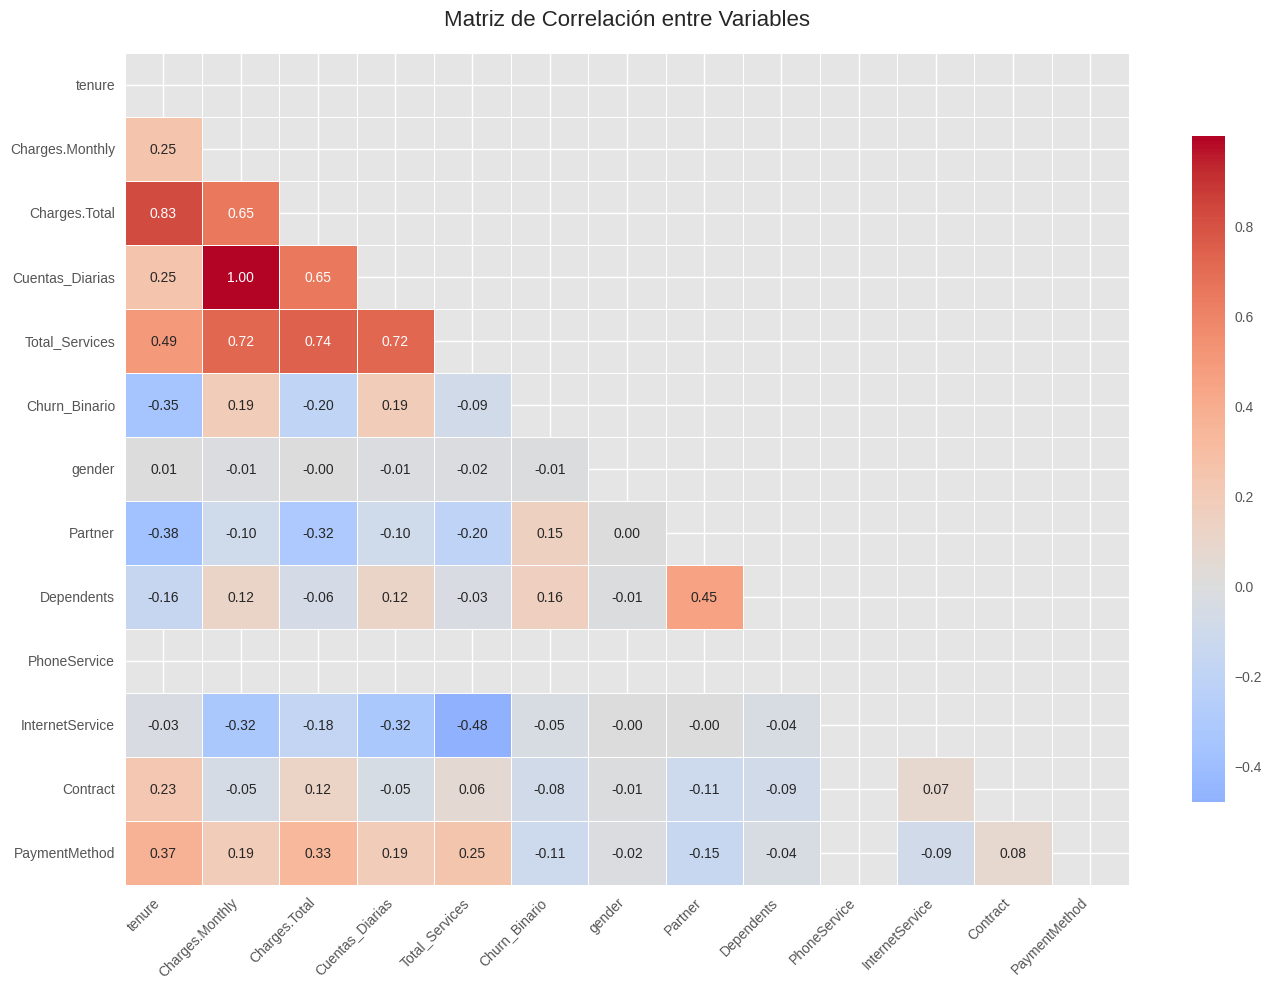


Análisis de Correlaciones Clave:


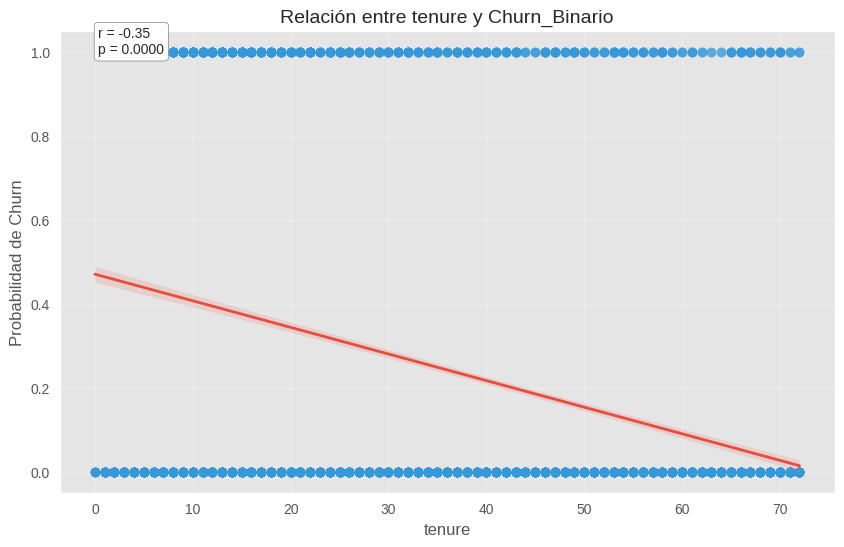

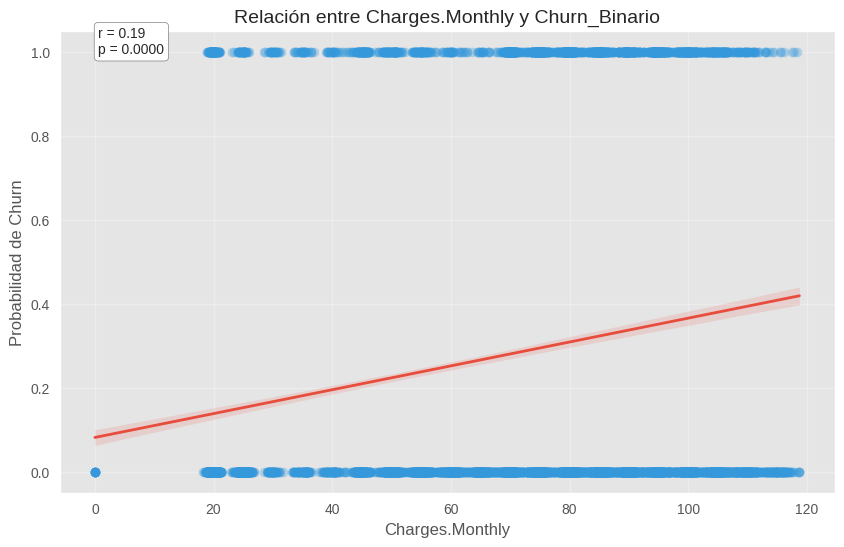

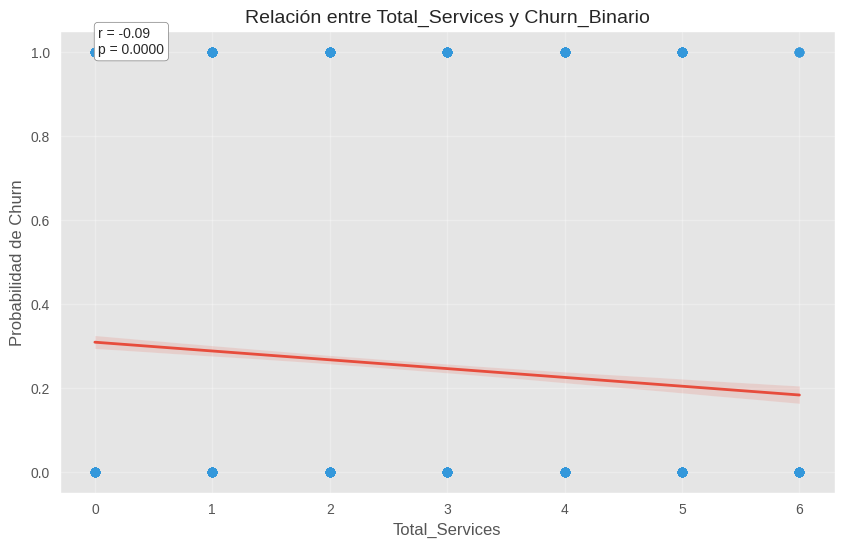

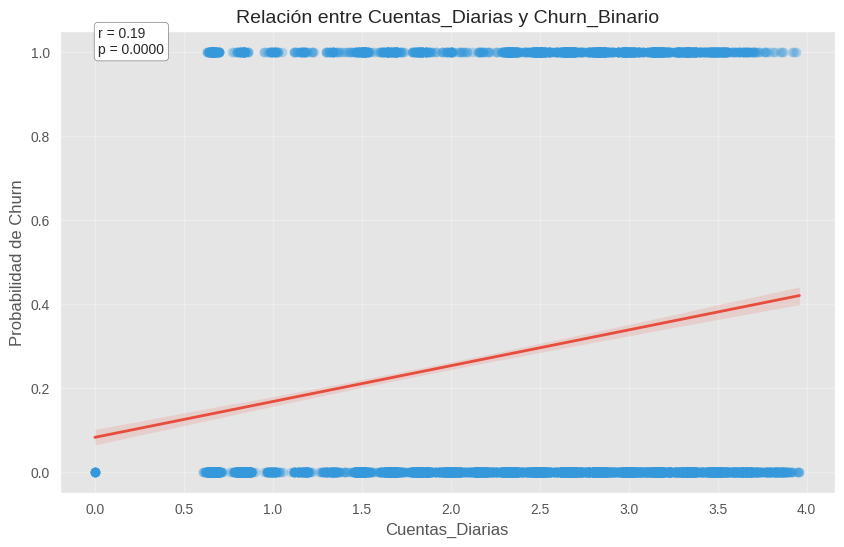

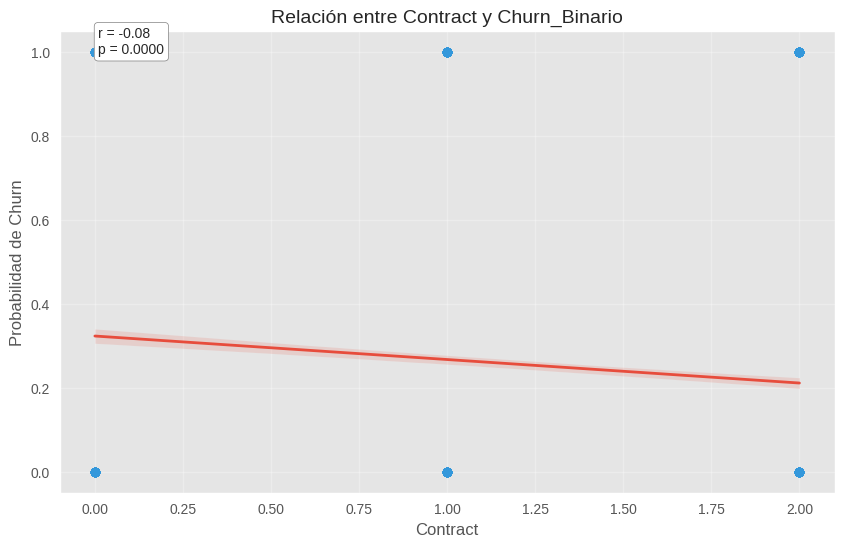


Análisis por Cantidad de Servicios Contratados:

Tasa de Churn por Cantidad de Servicios:
Service_Group
1-1      0.458
2-2      0.358
0-0      0.214
3-6.0    0.206
Name: Churn_Binario, dtype: float64


/tmp/ipython-input-672437597.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_churn = df_corr.groupby('Service_Group')['Churn_Binario'].mean().sort_values(ascending=False)
/tmp/ipython-input-672437597.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=service_churn.index, y=service_churn.values, palette="Blues_d")


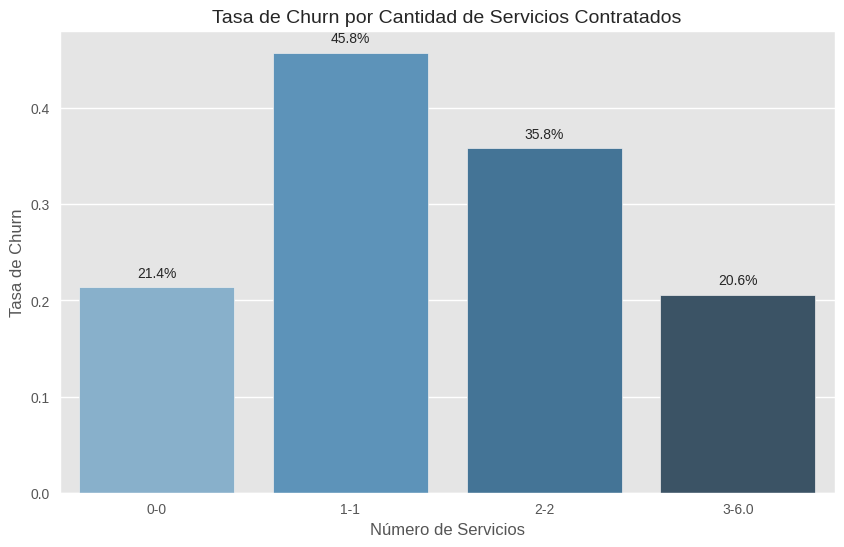


=== RESUMEN DE HALLAZGOS ===

🔹 Variables con Mayor Impacto en Churn:
1. tenure: Correlación negativa (-0.35)
2. Charges.Total: Correlación negativa (-0.20)
3. Cuentas_Diarias: Correlación positiva (0.19)
4. Charges.Monthly: Correlación positiva (0.19)
5. Dependents: Correlación positiva (0.16)

🔹 Insights sobre Servicios:
- Mayor riesgo: Clientes con 1-1 servicios (45.8% churn)
- Menor riesgo: Clientes con 3-6.0 servicios (20.6% churn)

✅ Datos de correlación guardados en 'telecom_correlation_analysis_robust.csv'

Análisis completado exitosamente 🚀


In [25]:
## ==============================================
## 1. Configuración inicial
## ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=== ANÁLISIS DE CORRELACIÓN CON CHURN (VERSIÓN CORREGIDA) ===")

# Configuración de estilo
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

## ==============================================
## 2. Preparación de datos CORREGIDA
## ==============================================
# Crear copia del DataFrame con las variables relevantes
df_corr = df_flat.copy()

# Verificar columnas existentes
available_cols = df_corr.columns.tolist()
required_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                'InternetService', 'Contract', 'PaymentMethod', 'Churn_Binario',
                'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

missing_cols = [col for col in required_cols if col not in available_cols]
if missing_cols:
    print(f"Advertencia: Columnas faltantes: {missing_cols}")

# Convertir variables categóricas a numéricas para correlación
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
            'InternetService', 'Contract', 'PaymentMethod']

for col in cat_cols:
    if col in df_corr.columns:
        df_corr[col] = pd.factorize(df_corr[col])[0]

# Crear variable adicional: Cantidad de servicios contratados (VERSIÓN CORREGIDA)
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
services = [s for s in services if s in df_corr.columns]  # Solo columnas existentes

# Versión completamente corregida del cálculo de servicios totales
if services:
    # Convertir cada columna de servicio a numérica primero
    for service in services:
        df_corr[service] = df_corr[service].map({'Yes': 1, 'No': 0}).fillna(0)

    # Sumar las columnas convertidas
    df_corr['Total_Services'] = df_corr[services].sum(axis=1)
else:
    df_corr['Total_Services'] = 0
    print("Advertencia: No se encontraron columnas de servicios para analizar")

# Seleccionar variables para análisis de correlación
corr_vars = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias',
             'Total_Services', 'Churn_Binario'] + [c for c in cat_cols if c in df_corr.columns]
df_corr = df_corr[corr_vars].dropna()  # Eliminar filas con valores faltantes

## ==============================================
## 3. Matriz de correlación MEJORADA
## ==============================================
print("\nMatriz de Correlación (Método de Pearson):")
corr_matrix = df_corr.corr(numeric_only=True)
churn_corr = corr_matrix['Churn_Binario'].sort_values(key=abs, ascending=False)
print(churn_corr)

# Visualización de matriz de correlación mejorada
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mostrar solo mitad inferior
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## ==============================================
## 4. Análisis de correlaciones específicas ROBUSTO
## ==============================================
print("\nAnálisis de Correlaciones Clave:")

# Función mejorada para gráficos de dispersión
def plot_scatter_with_reg(x_var, y_var='Churn_Binario', data=df_corr):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_var, y=y_var, data=data,
                scatter_kws={'alpha':0.3, 'color':'#3498db'},
                line_kws={'color':'#e74c3c', 'linewidth':2},
                ci=95)  # Intervalo de confianza del 95%
    plt.title(f'Relación entre {x_var} y {y_var}', fontsize=14)
    plt.xlabel(x_var, fontsize=12)
    plt.ylabel('Probabilidad de Churn', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Calcular y mostrar correlación
    valid_data = data[[x_var, y_var]].dropna()
    if len(valid_data) > 1:
        r, p = stats.pearsonr(valid_data[x_var], valid_data[y_var])
        plt.annotate(f'r = {r:.2f}\np = {p:.4f}',
                     xy=(0.05, 0.95), xycoords='axes fraction',
                     bbox=dict(boxstyle='round', fc='white', ec='gray'))
    plt.show()

# Variables a analizar con verificación
key_vars = ['tenure', 'Charges.Monthly', 'Total_Services', 'Cuentas_Diarias', 'Contract']
key_vars = [v for v in key_vars if v in df_corr.columns]  # Solo variables existentes

for var in key_vars:
    if df_corr[var].nunique() > 1:  # Solo si hay variación
        plot_scatter_with_reg(var)
    else:
        print(f"\nVariable {var} no tiene suficiente variación para análisis")

## ==============================================
## 5. Análisis por grupos de servicios MEJORADO
## ==============================================
if 'Total_Services' in df_corr.columns:
    print("\nAnálisis por Cantidad de Servicios Contratados:")

    # Crear grupos basados en cantidad de servicios (con bins adaptativos)
    max_services = df_corr['Total_Services'].max()
    bins = [0, 1, 2, 3, max_services+1] if max_services > 3 else [0, 1, 2, 3]
    labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

    df_corr['Service_Group'] = pd.cut(df_corr['Total_Services'],
                                    bins=bins,
                                    labels=labels,
                                    right=False)

    # Tasa de Churn por grupo de servicios
    service_churn = df_corr.groupby('Service_Group')['Churn_Binario'].mean().sort_values(ascending=False)
    print("\nTasa de Churn por Cantidad de Servicios:")
    print(service_churn.round(3))

    # Visualización mejorada
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=service_churn.index, y=service_churn.values, palette="Blues_d")
    plt.title('Tasa de Churn por Cantidad de Servicios Contratados', fontsize=14)
    plt.xlabel('Número de Servicios', fontsize=12)
    plt.ylabel('Tasa de Churn', fontsize=12)

    # Agregar etiquetas
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1%}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')
    plt.show()

## ==============================================
## 6. Resumen ejecutivo MEJORADO
## ==============================================
print("\n=== RESUMEN DE HALLAZGOS ===")

# Hallazgos principales con formato mejorado
if 'Churn_Binario' in df_corr.columns:
    print("\n🔹 Variables con Mayor Impacto en Churn:")
    top_vars = churn_corr.abs().sort_values(ascending=False).head(6).index.tolist()
    for i, var in enumerate(top_vars[1:], 1):  # Excluir Churn_Binario
        corr_value = churn_corr[var]
        direction = "positiva" if corr_value > 0 else "negativa"
        print(f"{i}. {var}: Correlación {direction} ({corr_value:.2f})")

if 'Service_Group' in df_corr.columns:
    print("\n🔹 Insights sobre Servicios:")
    min_churn_group = service_churn.idxmin()
    max_churn_group = service_churn.idxmax()
    print(f"- Mayor riesgo: Clientes con {max_churn_group} servicios ({service_churn[max_churn_group]:.1%} churn)")
    print(f"- Menor riesgo: Clientes con {min_churn_group} servicios ({service_churn[min_churn_group]:.1%} churn)")

# Guardar resultados con manejo de errores
try:
    df_corr.to_csv('telecom_correlation_analysis_robust.csv', index=False)
    print("\n✅ Datos de correlación guardados en 'telecom_correlation_analysis_robust.csv'")
except Exception as e:
    print(f"\n⚠️ Error al guardar resultados: {str(e)}")

print("\nAnálisis completado exitosamente 🚀")